# Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from collections import Counter
# Memory management
import gc 
pd.set_option('display.max_columns', None)

# SETUP DATA

In [2]:
df_train = pd.read_csv("home-credit-default-risk/application_train.csv")
df_test = pd.read_csv("home-credit-default-risk/application_test.csv")
df_pre_app = pd.read_csv("home-credit-default-risk/previous_application.csv")
df_bureau = pd.read_csv("home-credit-default-risk/bureau.csv")
df_bur_bal = pd.read_csv("home-credit-default-risk/bureau_balance.csv")
df_pos_cb = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")
df_credit_cb = pd.read_csv("home-credit-default-risk/credit_card_balance.csv")
df_instal_pay = pd.read_csv("home-credit-default-risk/installments_payments.csv")

In [3]:
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [151]:
df_train.shape

(307511, 122)

In [3]:
df_test.shape

(48744, 121)

# EDA (Exploratory Data Analysis) & Feature Extraction

In [4]:
df_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

- data terlihat imbalanced

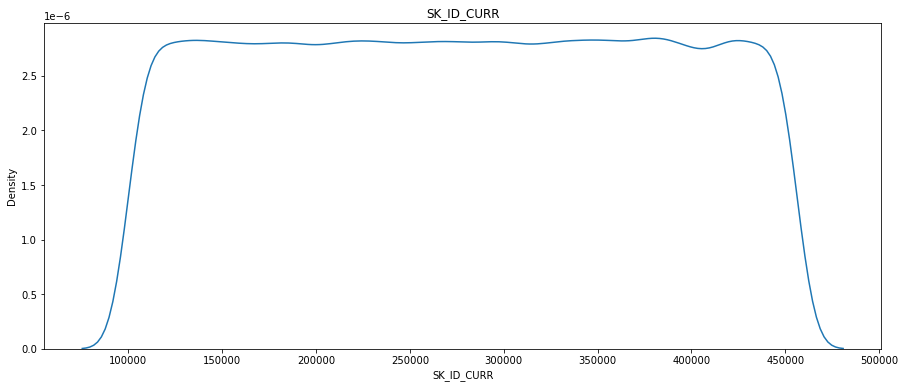

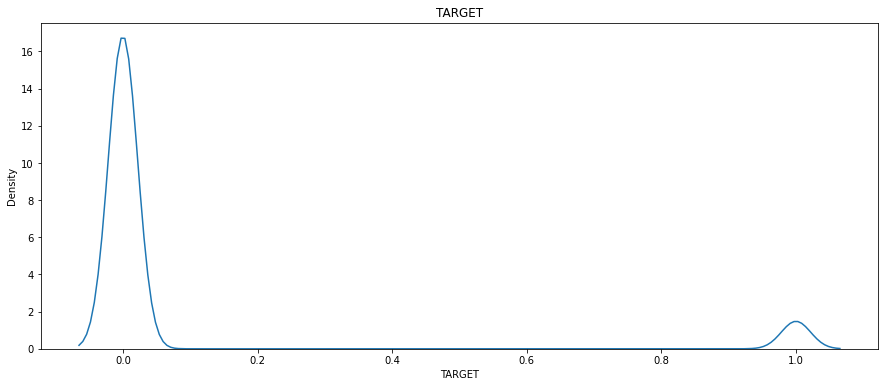

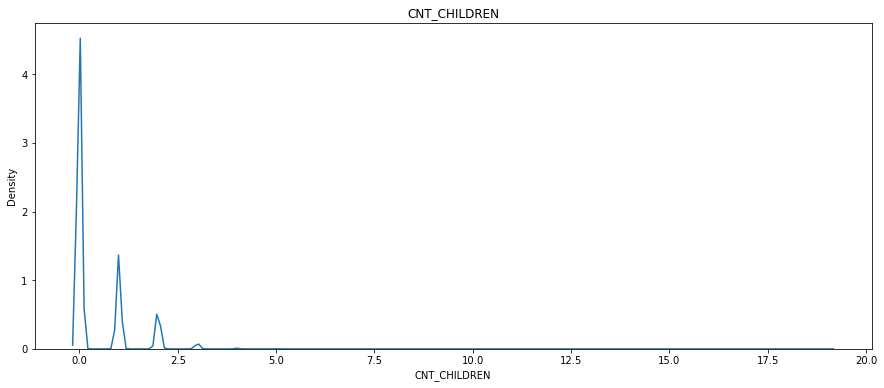

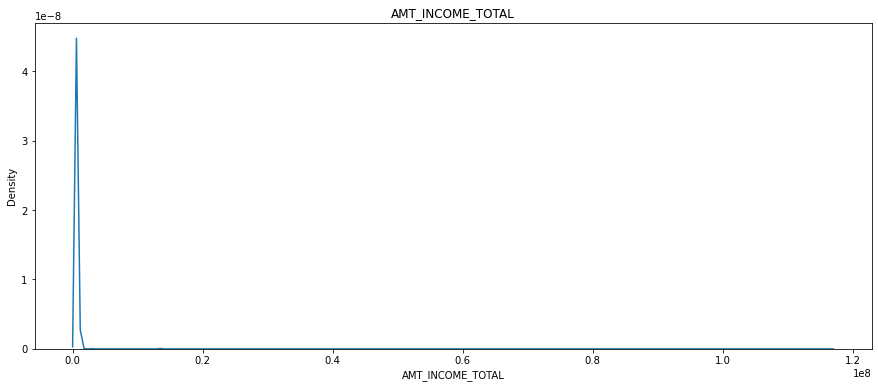

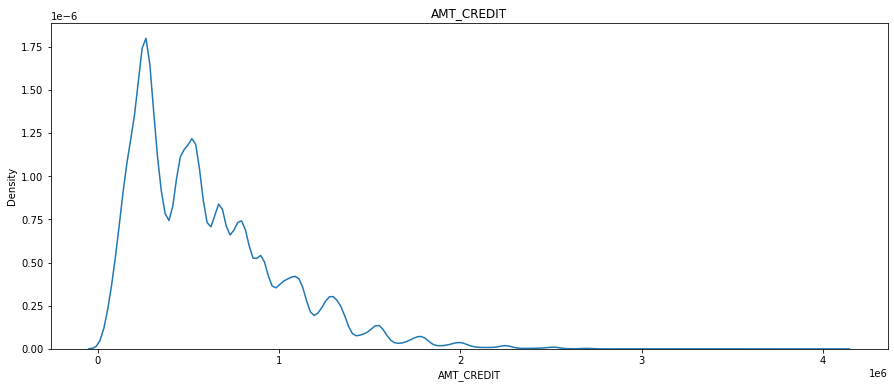

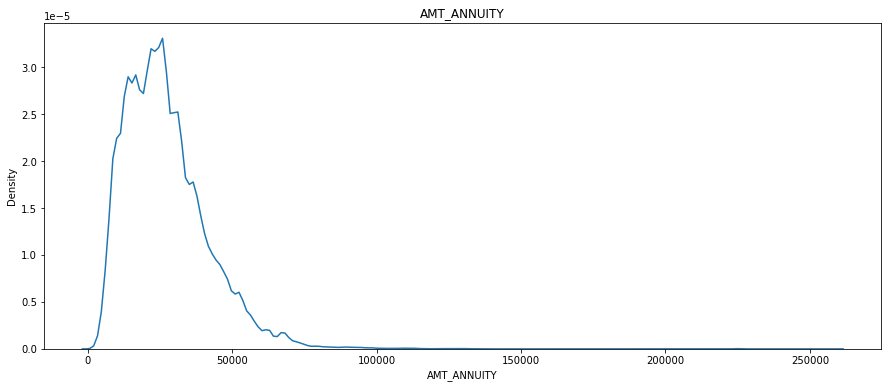

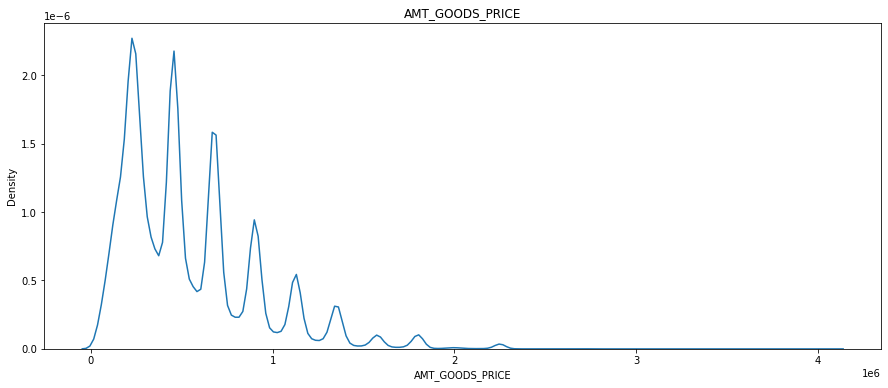

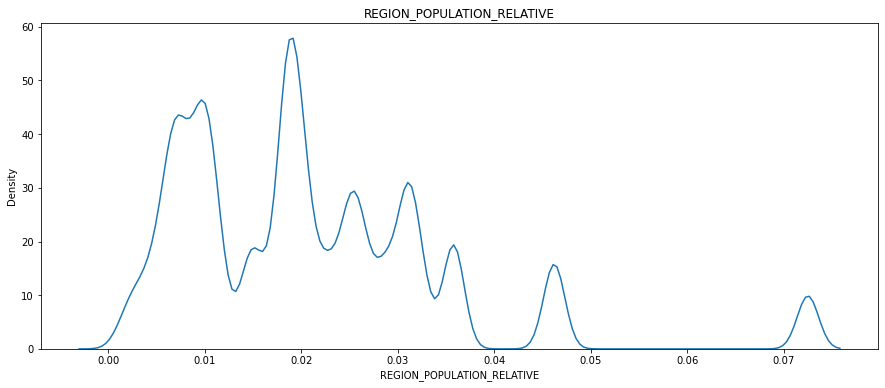

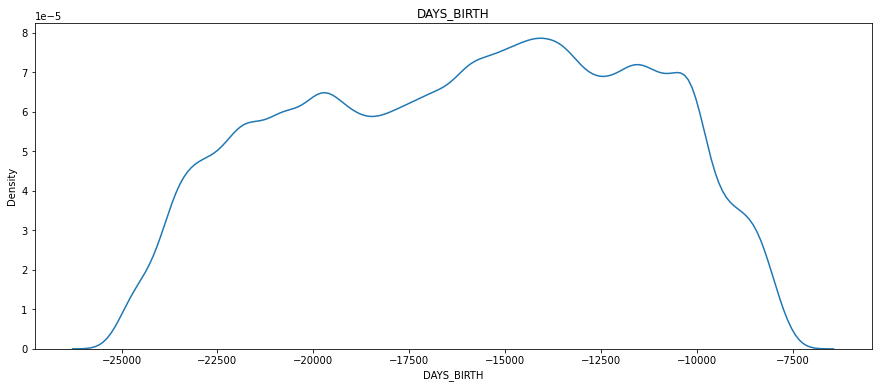

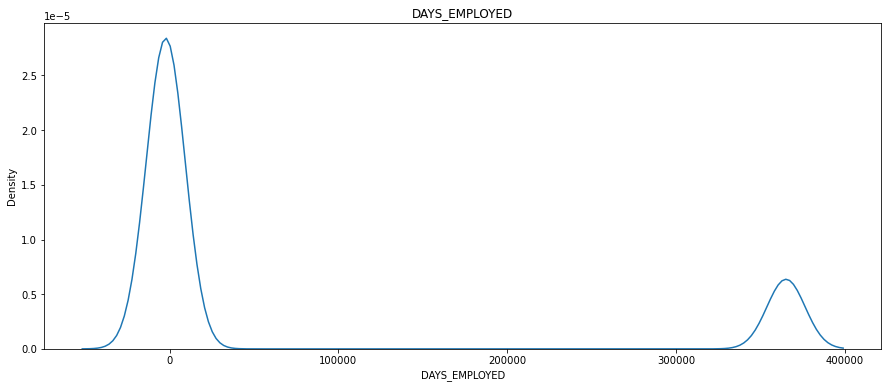

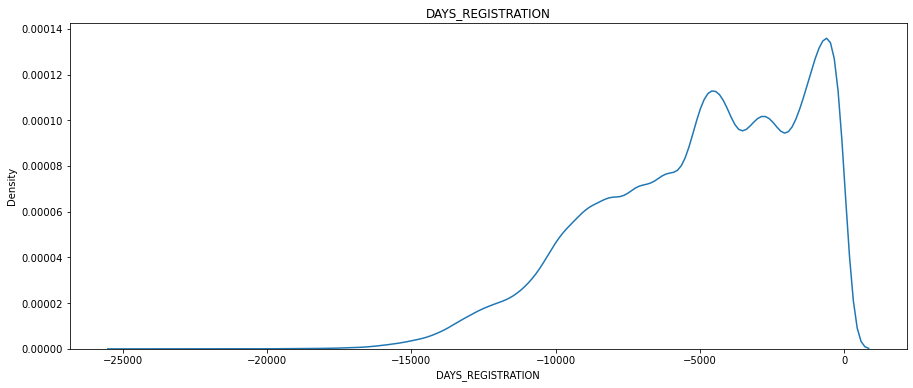

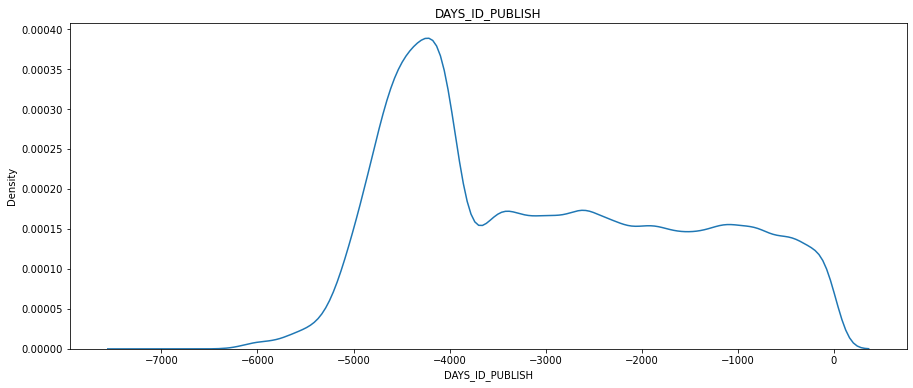

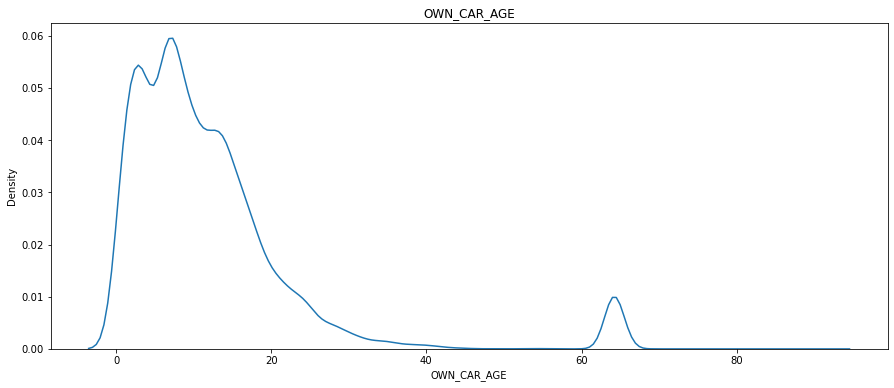

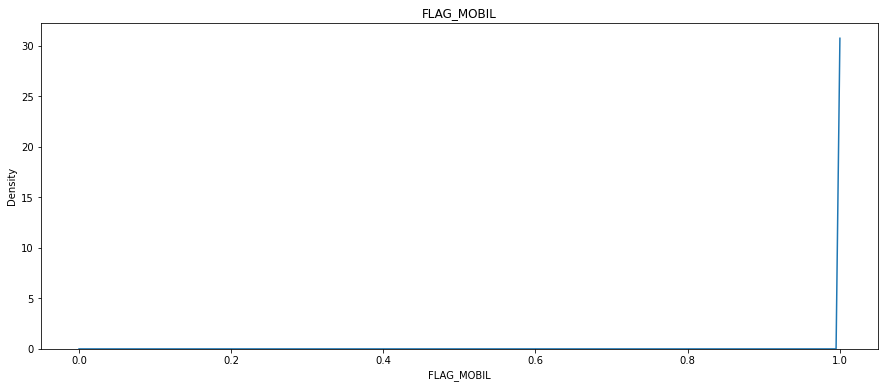

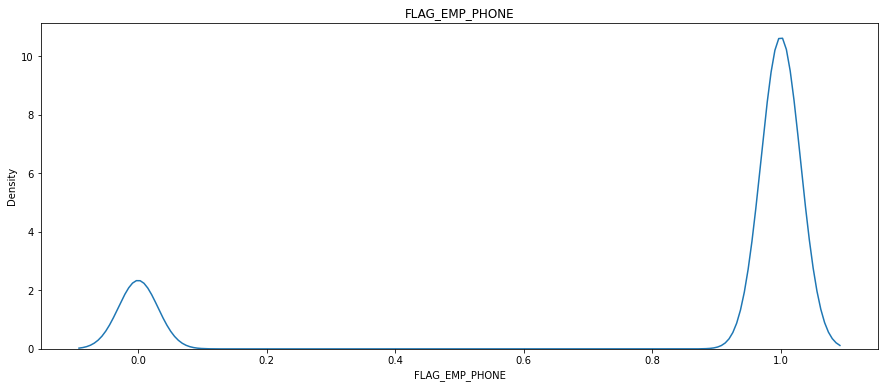

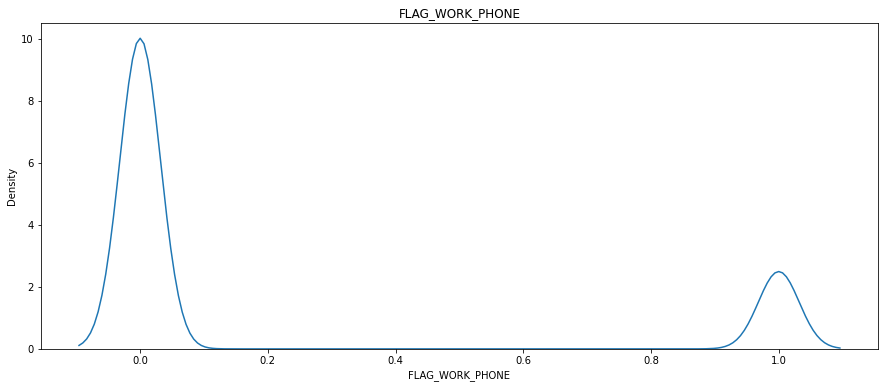

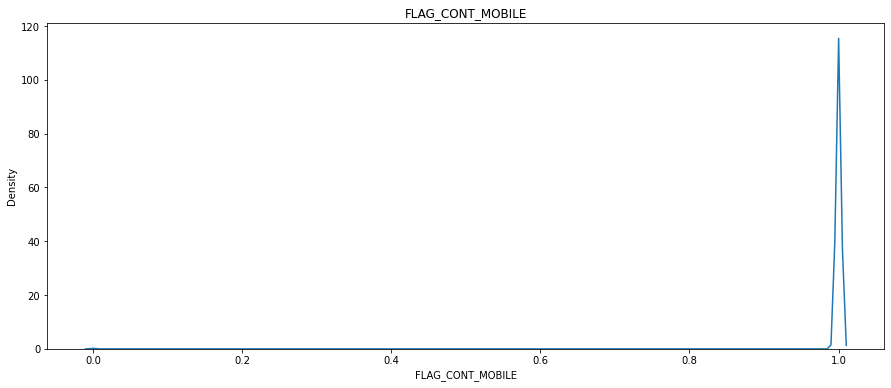

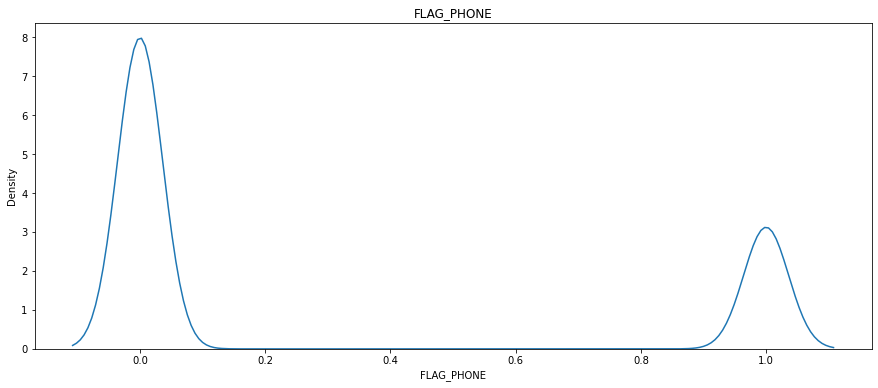

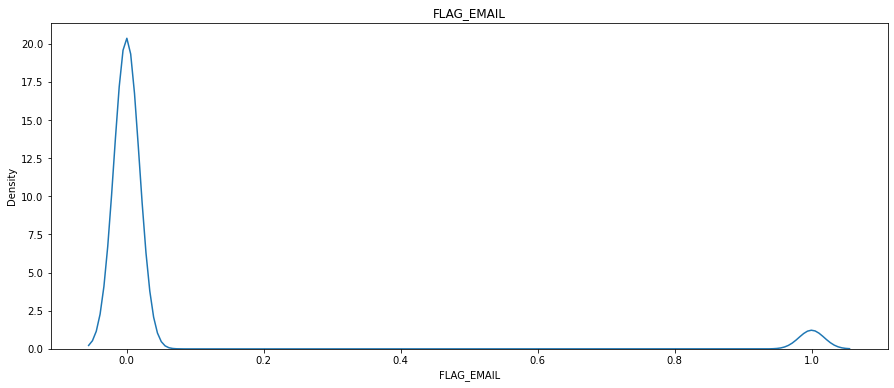

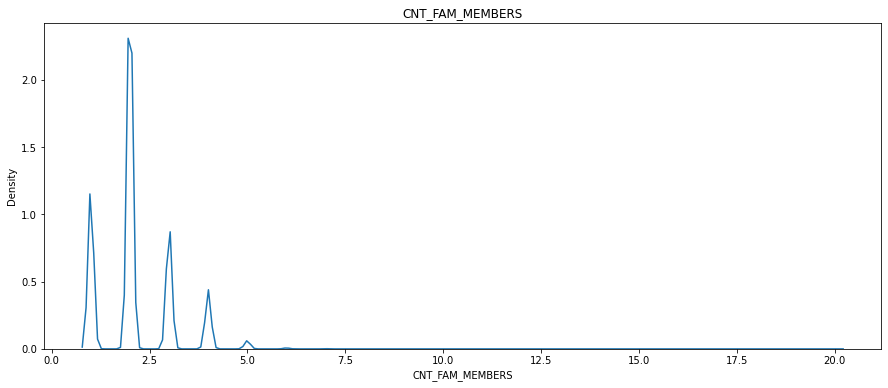

In [7]:
numeric =df_train.select_dtypes("number").columns.tolist()
for i in numeric[:20]:
    plt.figure(figsize = (15, 6))
    sns.kdeplot(x = i, data = df_train)
    plt.title(i)

- rata-rata dari tiap fitur memiliki distribusi fitur skewd

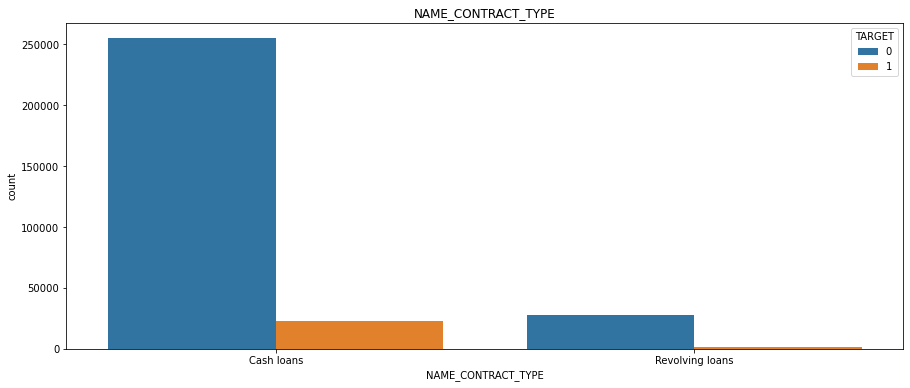

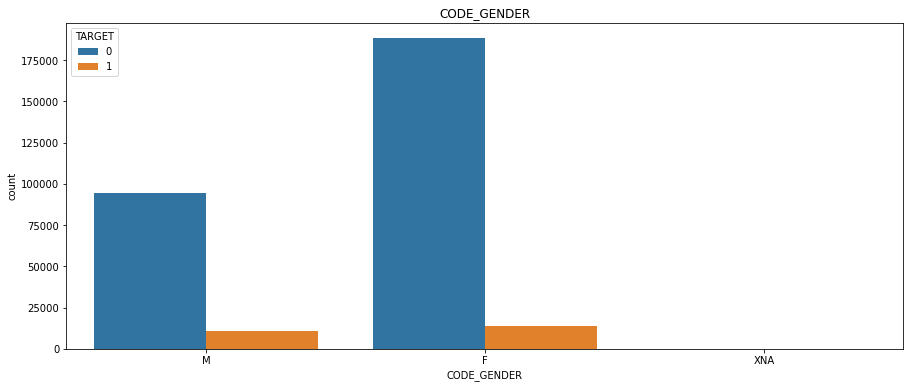

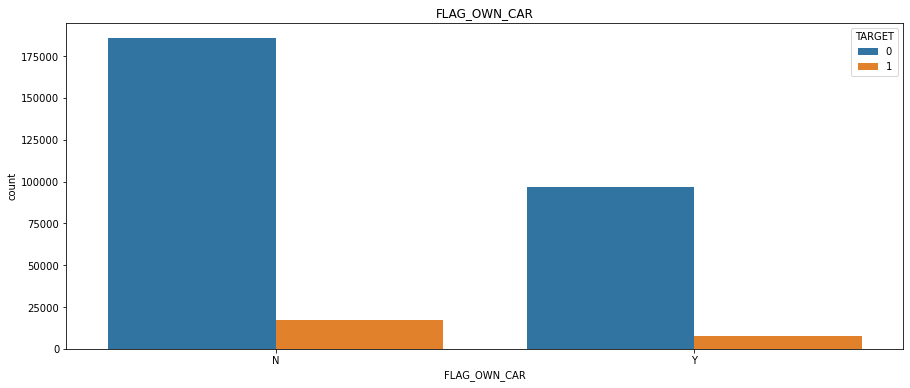

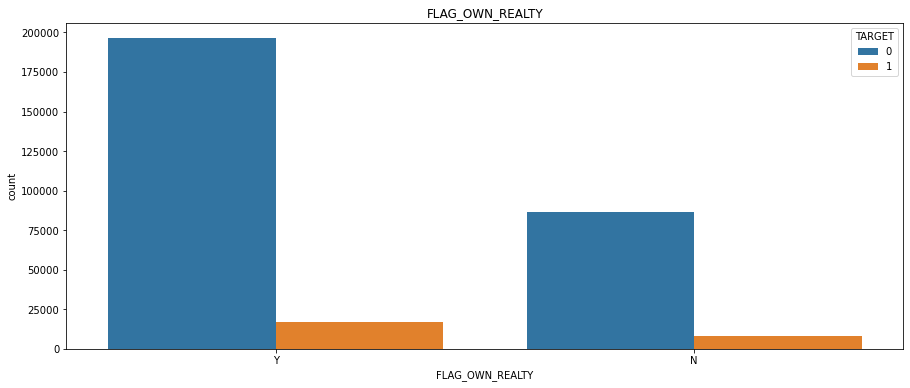

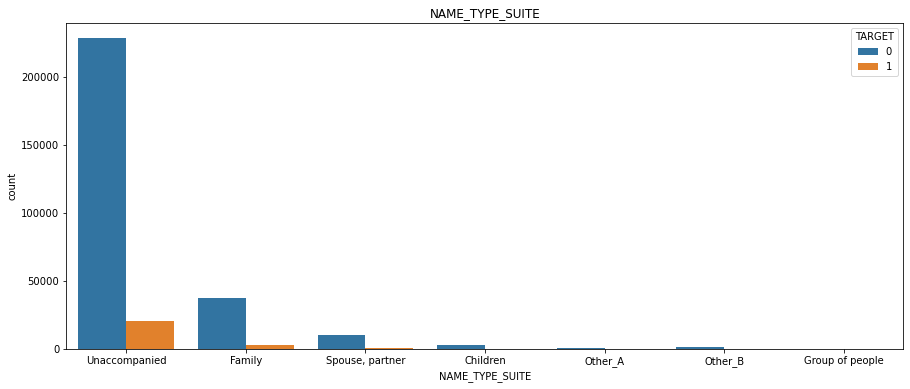

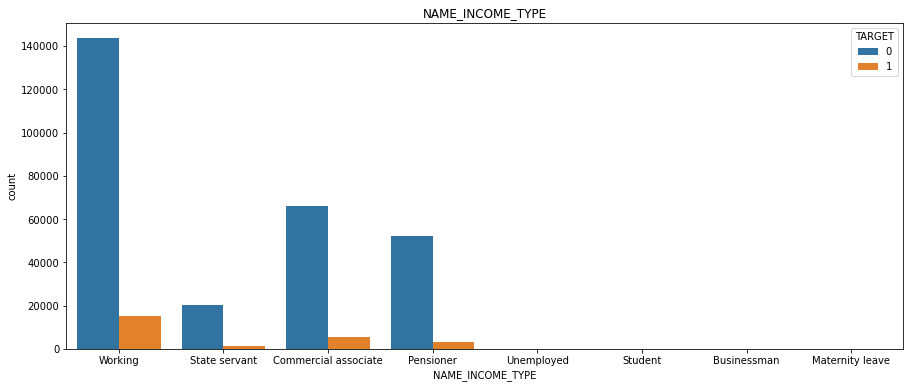

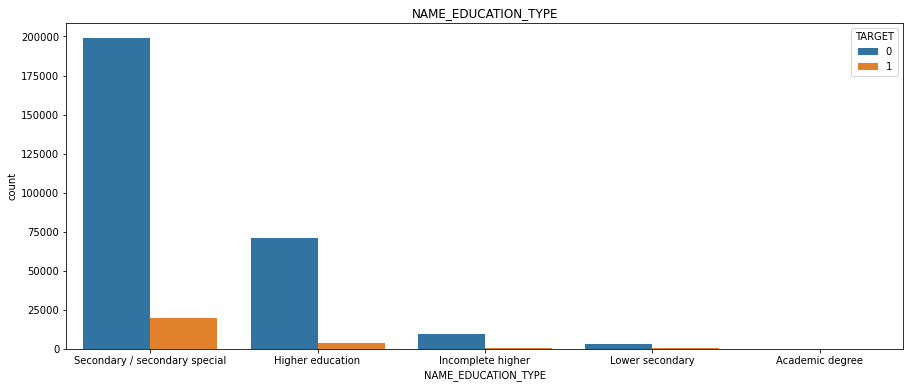

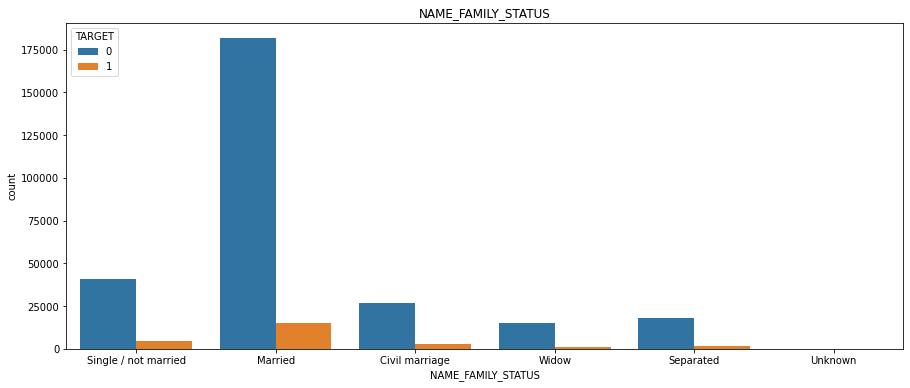

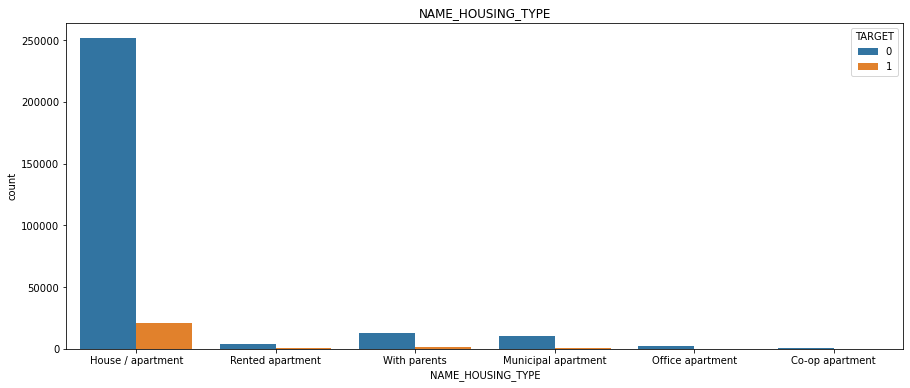

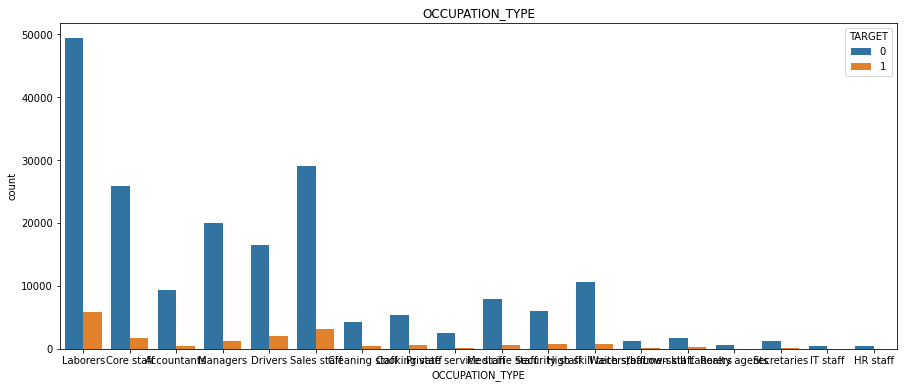

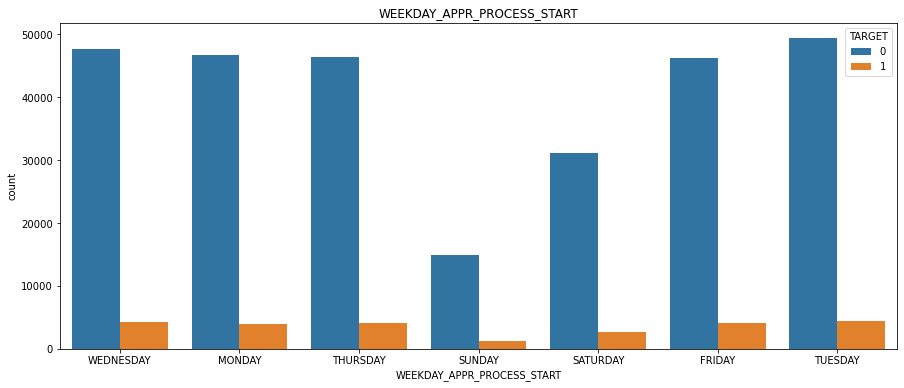

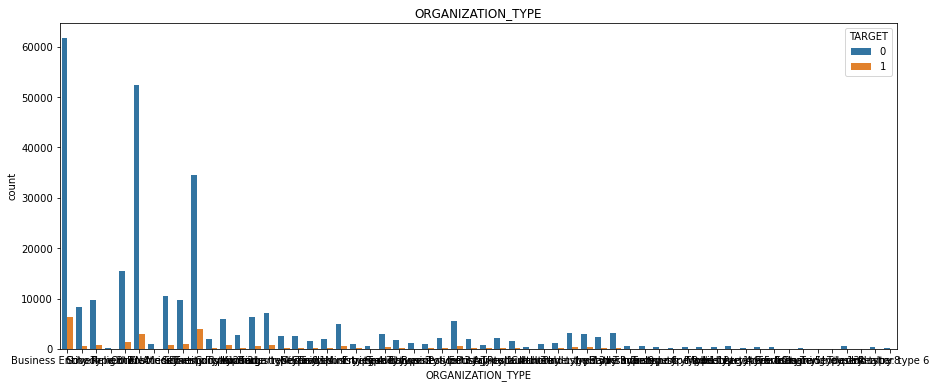

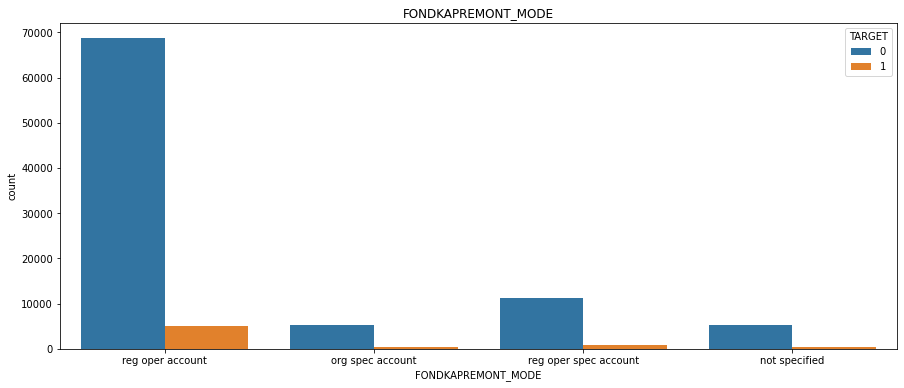

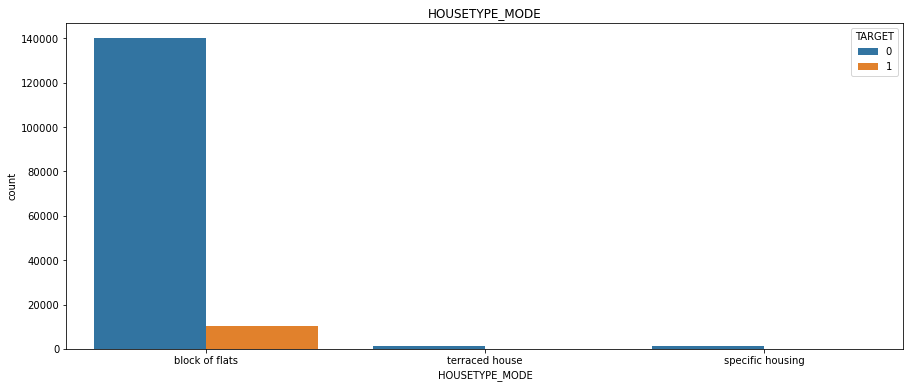

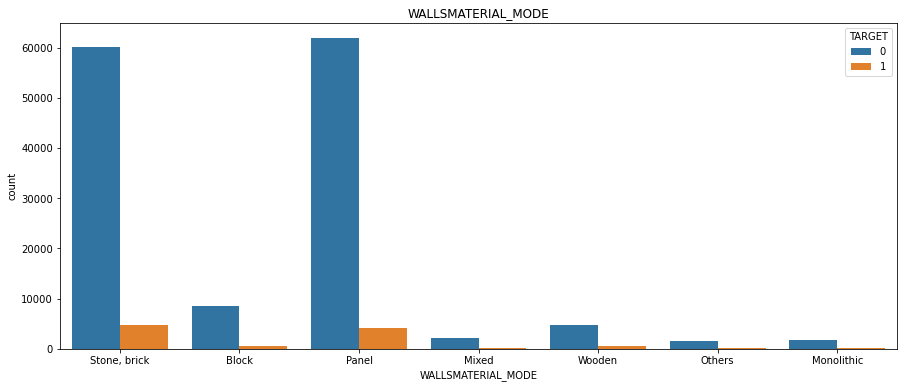

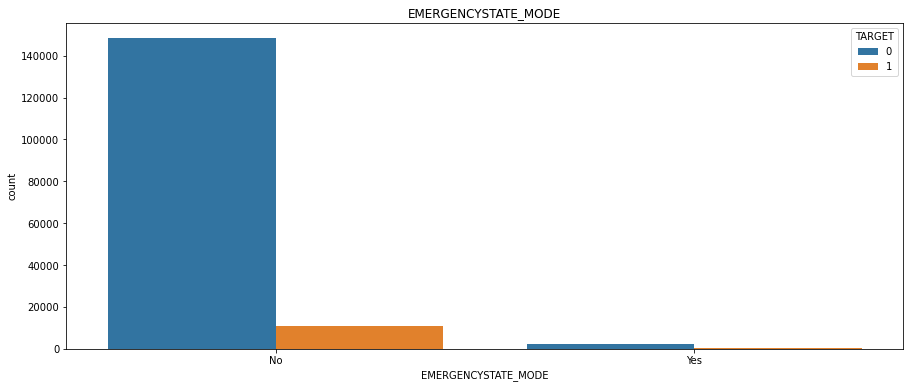

In [33]:
#Visualisasi data yang berpatok kepada hue/variabel
categorical = df_train.select_dtypes("object").columns.tolist()
for i in categorical:
    plt.figure(figsize = (15, 6))
    sns.countplot(x = i, data = df_train,hue = "TARGET")
    plt.title(i)

In [4]:
df_train['CREDIT_INCOME_PERCENT'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_train['ANNUITY_INCOME_PERCENT'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
df_test['CREDIT_INCOME_PERCENT'] = df_test['AMT_CREDIT'] / df_test['AMT_INCOME_TOTAL']
df_test['ANNUITY_INCOME_PERCENT'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']

In [5]:
df_train['CREDIT_INCOME_PERCENT'].value_counts()

2.000000     5302
3.000000     3920
2.500000     3142
5.000000     3119
3.333333     2815
             ... 
4.499805        1
2.418699        1
13.571429       1
8.219000        1
2.164368        1
Name: CREDIT_INCOME_PERCENT, Length: 48697, dtype: int64

In [6]:
df_train['YEARS_BIRTH'] = df_train['DAYS_BIRTH'] / -365
df_train['YEARS_BINNED'] = pd.cut(df_train['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 6))
df_test['YEARS_BIRTH'] = df_test['DAYS_BIRTH'] / -365
df_test['YEARS_BINNED'] = pd.cut(df_test['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 6))

In [9]:
df_train.shape

(307511, 126)

In [9]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 6))
age_data.head(10)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16608/648235586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16608/648235586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 6))


TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1       -9461    25.920548  (20.0, 30.0]
1       0      -16765    45.931507  (40.0, 50.0]
2       0      -19046    52.180822  (50.0, 60.0]
3       0      -19005    52.068493  (50.0, 60.0]
4       0      -19932    54.608219  (50.0, 60.0]
5       0      -16941    46.413699  (40.0, 50.0]
6       0      -13778    37.747945  (30.0, 40.0]
7       0      -18850    51.643836  (50.0, 60.0]
8       0      -20099    55.065753  (50.0, 60.0]
9       0      -14469    39.641096  (30.0, 40.0]

<AxesSubplot:xlabel='count', ylabel='YEARS_BINNED'>

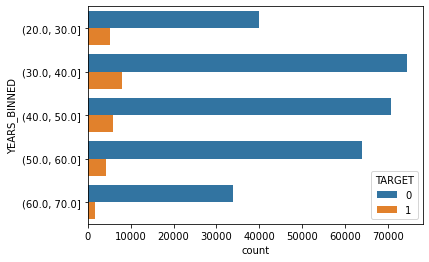

In [148]:
sns.countplot(y="YEARS_BINNED", data=age_data, hue="TARGET")

In [8]:
df_pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [105]:
df_pre_app.shape

(1670214, 37)

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

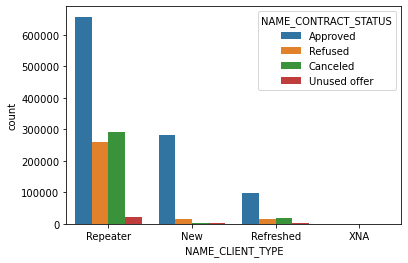

In [34]:
#Most Common Client Type where Contract Status
sns.countplot(x="NAME_CLIENT_TYPE", data=df_pre_app, hue="NAME_CONTRACT_STATUS")

In [104]:
df_pre_app["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

- sebanyak 17% dari pinjaman, di tolak

In [10]:
#Hour appr process start group
a = [8,9,10,11,12,13,14,15,16,17]
df_pre_app["HOUR_APPR_PROCESS_START"] = df_pre_app["HOUR_APPR_PROCESS_START"].replace(a, 'working_hours')
b = [18,19,20,21,22,23,0,1,2,3,4,5,6,7]
df_pre_app["HOUR_APPR_PROCESS_START"] = df_pre_app["HOUR_APPR_PROCESS_START"].replace(b, 'off_hours')

<AxesSubplot:xlabel='HOUR_APPR_PROCESS_START', ylabel='count'>

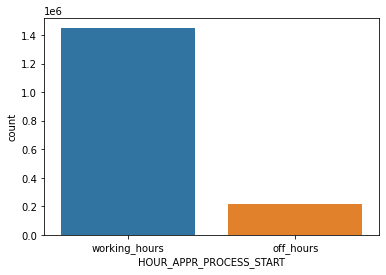

In [31]:
sns.countplot(x="HOUR_APPR_PROCESS_START", data=df_pre_app)

<AxesSubplot:xlabel='YEARS_BINNED', ylabel='count'>

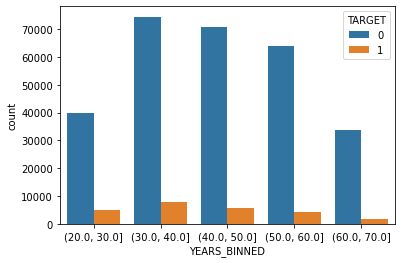

In [13]:
sns.countplot(x="YEARS_BINNED", data=age_data, hue="TARGET")

- terlihat semakin berumur, maka kesulitan bayar juga semakin kecil

<AxesSubplot:xlabel='count', ylabel='CHANNEL_TYPE'>

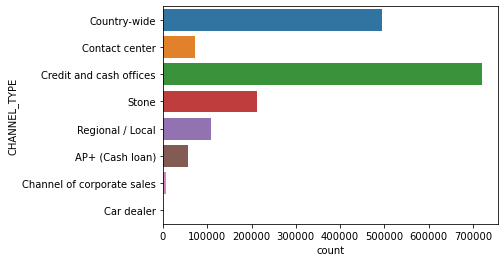

In [47]:
#Top channels through which they acquired the client on the previous application
sns.countplot(y=df_pre_app["CHANNEL_TYPE"])

<AxesSubplot:xlabel='count', ylabel='NAME_SELLER_INDUSTRY'>

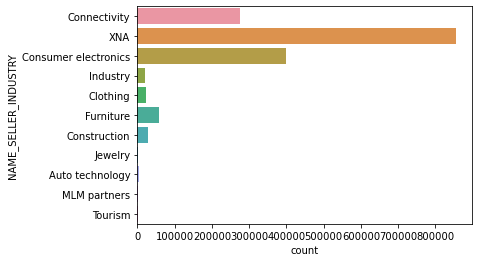

In [48]:
sns.countplot(y=df_pre_app["NAME_SELLER_INDUSTRY"])

<AxesSubplot:xlabel='count', ylabel='PRODUCT_COMBINATION'>

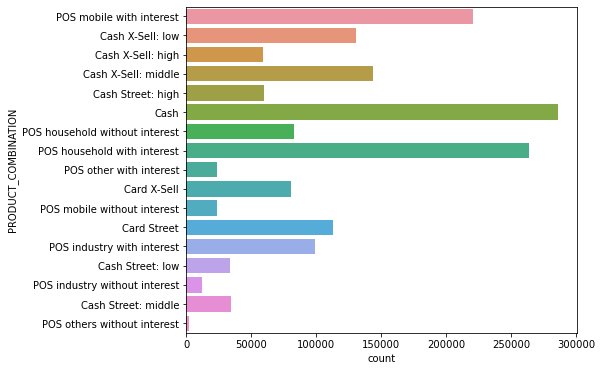

In [62]:
plt.figure(figsize = (7, 6))
sns.countplot(y=df_pre_app["PRODUCT_COMBINATION"])

In [16]:
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [17]:
df_bur_bal.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [19]:
df_pos_cb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [20]:
df_credit_cb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [22]:
df_instal_pay.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [11]:
df_instal_pay['NEW_DAYS_PAID_RANGE'] = df_instal_pay['DAYS_INSTALMENT']-df_instal_pay['DAYS_ENTRY_PAYMENT']

In [12]:
def paid(x):
    if x < 0:
        return "Earlier"
    elif x > 1:
        return "Late"      
    else:
        return "On_time"

In [13]:
df_instal_pay['NEW_DAYS_PAID_GROUP'] = df_instal_pay['NEW_DAYS_PAID_RANGE'].apply(paid)

<AxesSubplot:xlabel='NEW_DAYS_PAID_GROUP', ylabel='count'>

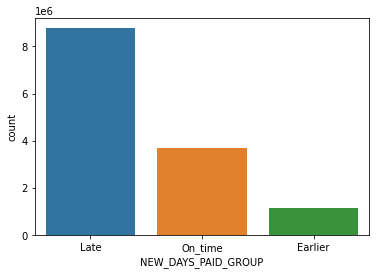

In [29]:
sns.countplot(x="NEW_DAYS_PAID_GROUP", data=df_instal_pay)

In [309]:
df_instal_pay['NEW_DAYS_PAID_GROUP'].value_counts()

Late       8784097
On_time    3674635
Earlier    1146669
Name: NEW_DAYS_PAID_GROUP, dtype: int64

In [14]:
def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype('category')
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

### Train Application

In [15]:
df_train = convert_types(df_train)
df_test = convert_types(df_test)

In [16]:
df_train["CODE_GENDER"].dtypes

CategoricalDtype(categories=['F', 'M', 'XNA'], ordered=False)

In [17]:
df_train["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [18]:
df_train = df_train.drop(df_train[df_train["CODE_GENDER"] == "XNA"].index).reset_index(drop=True)
df_train = df_train.drop(df_train[df_train["NAME_FAMILY_STATUS"] == "Unknown"].index).reset_index(drop=True)

In [19]:
df_train.shape

(307505, 126)

In [20]:
(df_train['DAYS_EMPLOYED']).describe()

count    307505.000000
mean      63816.348794
std      141276.836143
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [21]:
df_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)

In [22]:
def agg_numeric(df, parent_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed. 
    
    """
    
    # Remove id variables other than grouping variable
    for col in df:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    # Only want the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count','sum','mean', 'max', 'min'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [23]:
def agg_categorical(df, parent_var, df_name):
    """
    Aggregates the categorical features in a child dataframe
    for each observation of the parent variable.
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    parent_var : string
        The variable by which to group and aggregate the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with aggregated statistics for each observation of the parent_var
        The columns are also renamed and columns with duplicate values are removed.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the count and mean (categorical better count and mean)
    categorical = categorical.groupby(parent_var).agg(['count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

## Previous Application

Sebagai sebuah produk perbankan, anuitas adalah sebuah pembayaran yang dilakukan nasabah dengan nominal dan mark-up bunga tetap

In [60]:
pd.set_option('display.max_columns', None)
df_pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0           working_hours                           Y                       1   
1           working_hours                           Y                       1   
2           working_hours                           Y                       1   
3               off_hours                           Y                       1   
4           working_hours                           Y                       1   

   RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                0.0               0.182832                  0.867336   
1                NaN                    NaN                       NaN   
2                NaN                    NaN                       NaN   
3                NaN                    NaN                       NaN   
4                NaN                    NaN                       NaN   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                    XAP             Approved            -73   
1                    XNA             Approved           -164   
2                    XNA             Approved           -301   
3                    XNA             Approved           -512   
4                Repairs              Refused           -781   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0  Cash through the bank                XAP              NaN         Repeater   
1                    XNA                XAP    Unaccompanied         Repeater   
2  Cash through the bank                XAP  Spouse, partner         Repeater   
3  Cash through the bank                XAP              NaN         Repeater   
4  Cash through the bank                 HC              NaN         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FI

In [24]:
df_pre_app = convert_types(df_pre_app)

In [25]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(df_pre_app, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (338857, 76)


previous_DAYS_DECISION_sum  previous_DAYS_DECISION_min  \
SK_ID_CURR                                                           
100001                           -1740                       -1740   
100002                            -606                        -606   
100003                           -3915                       -2341   
100004                            -815                        -815   
100005                           -1072                        -757   

            previous_DAYS_DECISION_mean  previous_DAYS_DECISION_max  \
SK_ID_CURR                                                            
100001                          -1740.0                       -1740   
100002                           -606.0                        -606   
100003                          -1305.0                        -746   
100004                           -815.0                        -815   
100005                           -536.0                        -315   

            previous_DAYS_FIRST_DUE_sum  previous_DAYS_FIRST_DUE_min  \
SK_ID_CURR                                                             
100001                          -1709.0                      -1709.0   
100002                           -565.0                       -565.0   
100003                          -3823.0                      -2310.0   
100004                           -784.0                       -784.0   
100005                           -706.0                       -706.0   

            previous_DAYS_FIRST_DUE_mean  previous_DAYS_FIRST_DUE_max  \
SK_ID_CURR                                                              
100001                      -1709.000000                      -1709.0   
100002                       -565.000000                       -565.0   
100003                      -1274.333374                       -716.0   
100004                       -784.000000                       -784.0   
100005                       -706.000000                       -706.0   

            previous_DAYS_LAST_DUE_sum  previous_DAYS_LAST_DUE_min  \
SK_ID_CURR                                                           
100001                         -1619.0                     -1619.0   
100002                           -25.0                       -25.0   
100003                         -3163.0                     -1980.0   
100004                          -724.0                      -724.0   
100005                          -466.0                      -466.0   

            previous_DAYS_LAST_DUE_mean  previous_DAYS_LAST_DUE_max  \
SK_ID_CURR                                                            
100001                     -1619.000000                     -1619.0   
100002                       -25.000000                       -25.0   
100003                     -1054.333374                      -536.0   
100004                      -724.000000                      -724.0   
100005                      -466.000000                      -466.0   

            previous_DAYS_TERMINATION_sum  previous_DAYS_TERMINATION_min  \
SK_ID_CURR                                                                 
100001                            -1612.0                        -1612.0   
100002                              -17.0                          -17.0   
100003                            -3142.0                        -1976.0   
100004                             -714.0                         -714.0   
100005                             -460.0                         -460.0   

            previous_DAYS_TERMINATION_mean  previous_DAYS_TERMINATION_max  \
SK_ID_CURR                                                                  
100001                        -1612.000000                        -1612.0   
100002                          -17.000000                          -17.0   
100003                        -1047.333374                         -527.0   
100004                         -714.000000                         -714.0   
100005                

In [26]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(df_pre_app, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (338857, 147)


previous_NAME_GOODS_CATEGORY_Animals_mean  \
SK_ID_CURR                                              
100001                                            0.0   
100002                                            0.0   
100003                                            0.0   
100004                                            0.0   
100005                                            0.0   

            previous_NAME_GOODS_CATEGORY_House Construction_mean  \
SK_ID_CURR                                                         
100001                                                    0.0      
100002                                                    0.0      
100003                                                    0.0      
100004                                                    0.0      
100005                                                    0.0      

            previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Hobby_mean  \
SK_ID_CURR                                               
100001                                             0.0   
100002                                             0.0   
100003                                             0.0   
100004                                             0.0   
100005                                             0.0   

            previous_NAME_GOODS_CATEGORY_Education_mean  \
SK_ID_CURR                                                
100001                                              0.0   
100002                                              0.0   
100003                                              0.0   
100004                                              0.0   
100005                                              0.0   

            previous_NAME_GOODS_CATEGORY_Additional Service_mean  \
SK_ID_CURR                                                         
100001                                                    0.0      
100002                                                    0.0      
100003                                                    0.0      
100004                                                    0.0      
100005                                                    0.0      

            previous_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_mean  \
SK_ID_CURR                                                                     
100001                                                    0.0                  
100002                                                    0.0                  
100003                                                    0.0                  
100004                                                    0.0                  
100005                                                    0.0                  

            previous_NAME_CASH_LOAN_PURPOSE_Buying a garage_mean  \
SK_ID_CURR                                                         
100001                                                    0.

In [27]:
# Merge in the previous information
train = df_train.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
train = df_train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

In [28]:
test = df_test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test = df_test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

In [24]:
train.shape

(307505, 200)

### Function Missing values

In [29]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, threshold = 75):
    # Total missing values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    #percent for missing values based on threshold
    miss = pd.DataFrame(df.isnull().sum())
    miss['percent'] = 100 * miss[0] / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
        
    missing_columns = list(miss.index[miss['percent'] > threshold])

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
        
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [30]:
def remove_missing_columns(train, test, threshold = 75):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    train_miss = pd.DataFrame(train.isnull().sum())
    train_miss['percent'] = 100 * train_miss[0] / len(train)
    
    test_miss = pd.DataFrame(test.isnull().sum())
    test_miss['percent'] = 100 * test_miss[0] / len(test)
    
    # list of missing columns for train and test
    missing_train_columns = list(train_miss.index[train_miss['percent'] > threshold])
    missing_test_columns = list(test_miss.index[test_miss['percent'] > threshold])
    
    # Combine the two lists together
    missing_columns = list(set(missing_train_columns + missing_test_columns))
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))
    
    # Drop the missing columns and return
    train = train.drop(columns = missing_columns)
    test = test.drop(columns = missing_columns)
    
    return train, test

## Missing Values

In [31]:
missing_values_table(train).head(15)

Your selected dataframe has 202 columns.
There are 144 columns that have missing values.
There are 6 columns with greater than 75% missing values.


Missing Values  % of Total Values
previous_RATE_INTEREST_PRIVILEGED_max           302896               98.5
previous_RATE_INTEREST_PRIMARY_max              302896               98.5
previous_RATE_INTEREST_PRIVILEGED_mean          302896               98.5
previous_RATE_INTEREST_PRIMARY_min              302896               98.5
previous_RATE_INTEREST_PRIMARY_mean             302896               98.5
previous_RATE_INTEREST_PRIVILEGED_min           302896               98.5
COMMONAREA_MEDI                                 214861               69.9
COMMONAREA_AVG                                  214861               69.9
COMMONAREA_MODE                                 214861               69.9
NONLIVINGAPARTMENTS_MODE                        213511               69.4
NONLIVINGAPARTMENTS_MEDI                        213511               69.4
NONLIVINGAPARTMENTS_AVG                         213511               69.4
FONDKAPREMONT_MODE                              210292               68.4
LIVINGAPARTMENTS_MODE                           210196               68.4
LIVINGAPARTMENTS_AVG                            210196               68.4

In [32]:
train, test = remove_missing_columns(train, test)

There are 6 columns with greater than 75% missing values.


In [33]:
train.shape

(307505, 196)

In [34]:
test.shape

(48744, 195)

In [35]:
def aggregate_client(df, group_vars, df_names):
    """Aggregate a dataframe with data at the loan level 
    at the client level
    
    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan 
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])
        
    Returns:
        df_client (dataframe): aggregated numeric stats at the client level. 
        Each client will have a single row with all the numeric data aggregated
    """
    
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, parent_var = group_vars[0], df_name = df_names[0])
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

## Monthly Cash Data Balance of Client previous

In [36]:
df_pos_cb = convert_types(df_pos_cb, print_info=True)

Original Memory Usage: 0.64 gb.
New Memory Usage: 0.41 gb.


In [330]:
df_pos_cb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [79]:
df_pos_cb.nunique()

SK_ID_PREV               936325
SK_ID_CURR               337252
MONTHS_BALANCE               96
CNT_INSTALMENT               73
CNT_INSTALMENT_FUTURE        79
NAME_CONTRACT_STATUS          9
SK_DPD                     3400
SK_DPD_DEF                 2307
dtype: int64

In [38]:
df_pos_cb.shape

(10001358, 8)

In [37]:
cash_by_client = aggregate_client(df_pos_cb, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['cash', 'client'])
cash_by_client.head()

client_cash_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                       
100001                                   -2887   
100002                                   -3610   
100003                                  -13240   
100004                                    -408   
100005                                   -2420   

            client_cash_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                       
100001                                    -669   
100002                                    -361   
100003                                   -1348   
100004                                    -108   
100005                                    -275   

            client_cash_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                        
100001                                   -653.0   
100002                                   -190.0   
100003                                  -1226.0   
100004                                   -102.0   
100005                                   -220.0   

            client_cash_MONTHS_BALANCE_max_sum  \
SK_ID_CURR                                       
100001                                    -637   
100002                                     -19   
100003                                   -1104   
100004                                     -96   
100005                                    -165   

            client_cash_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                       
100001                                    -378   
100002                                    -190   
100003                                    -858   
100004                                    -102   
100005                                    -220   

            client_cash_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                        
100001                              -320.777778   
100002                              -190.000000   
100003                              -472.857143   
100004                              -102.000000   
100005                              -220.000000   

            client_cash_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                       
100001                                    -275   
100002                                    -190   
100003                                    -172   
100004                                    -102   
100005                                    -220   

            client_cash_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                       
100001                                     -96   
100002                                     -19   
100003                                     -77   
100004                                     -27   
100005                                     -25   

            client_cash_MONTHS_BALANCE_mean_min  \
SK_ID_CURR                                        
100001                                    -94.5   
100002                                    -10.0   
100003                                    -71.5   
100004                                    -25.5   
100005                                    -20.0   

            client_cash_MONTHS_BALANCE_max_min  \
SK_ID_CURR                                       
100001                                     -93   
100002                                      -1   
100003                                     -66   
100004                                     -24   
100005                                     -15   

            client_cash_MONTHS_BALANCE_min_mean  \
SK_ID_CURR                                        
100001                               -74.333333   
100002                               -19.000000   
100003                               -48.142857   
100004                               -27.000000   
100005                               -25.000000   

            client_cash_MONTHS_BALANCE_mean_mean  \
SK_ID_CURR                                         
100001             

In [39]:
cash_by_client.shape

(337252, 130)

In [40]:
print('Cash by Client Shape: ', cash_by_client.shape)
train = train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del cash_by_client
gc.collect()

Cash by Client Shape:  (337252, 130)


0

In [41]:
train, test = remove_missing_columns(train, test)

There are 0 columns with greater than 75% missing values.


## Monthly Credit Data Balance of Client previous

In [42]:
df_credit_cb = convert_types(df_credit_cb, print_info=True)

Original Memory Usage: 0.71 gb.
New Memory Usage: 0.42 gb.


In [43]:
credit_by_client = aggregate_client(df_credit_cb, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['credit', 'client'])
credit_by_client.head()

client_credit_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                         
100006                                      -126   
100011                                   -210826   
100013                                   -446976   
100021                                     -2890   
100023                                      -480   

            client_credit_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                         
100006                                       -36   
100011                                     -5550   
100013                                     -9216   
100021                                      -306   
100023                                       -88   

            client_credit_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                          
100006                                      -21.0   
100011                                    -2849.0   
100013                                    -4656.0   
100021                                     -170.0   
100023                                      -60.0   

            client_credit_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                         
100006                                       -21   
100011                                     -2849   
100013                                     -4656   
100021                                      -170   
100023                                       -60   

            client_credit_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                          
100006                                      -21.0   
100011                                    -2849.0   
100013                                    -4656.0   
100021                                     -170.0   
100023                                      -60.0   

            client_credit_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                         
100006                                       -21   
100011                                     -2849   
100013                                     -4656   
100021                                      -170   
100023                                       -60   

            client_credit_MONTHS_BALANCE_max_sum  \
SK_ID_CURR                                         
100006                                        -6   
100011                                      -148   
100013                                       -96   
100021                                       -34   
100023                                       -32   

            client_credit_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                         
100006                                        -6   
100011                                       -75   
100013                                       -96   
100021                                       -18   
100023                                       -11   

            client_credit_MONTHS_BALANCE_min_mean  \
SK_ID_CURR                                          
100006                                       -6.0   
100011                                      -75.0   
100013                                      -96.0   
100021                                      -18.0   
100023                                      -11.0   

            client_credit_MONTHS_BALANCE_min_max  \
SK_ID_CURR                                         
100006                                        -6   
100011                                       -75   
100013                                       -96   
100021                                       -18   
100023                                       -11   

            client_credit_MONTHS_BALANCE_mean_min  \
SK_ID_CURR                                          
100006                                       -3.5   
100011                                      -38.5   
100013                                      -48.5   
100021                                      -10.0   
100023                 

In [44]:
print('Credit by client shape: ', credit_by_client.shape)

train = train.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del credit_by_client
gc.collect()

Credit by client shape:  (103558, 355)


0

In [48]:
missing_values_table(train)

Your selected dataframe has 681 columns.
There are 623 columns that have missing values.
There are 63 columns with greater than 75% missing values.


Missing Values  % of Total Values
client_credit_AMT_PAYMENT_CURRENT_max_max           246445               80.1
client_credit_AMT_PAYMENT_CURRENT_max_min           246445               80.1
client_credit_AMT_PAYMENT_CURRENT_max_mean          246445               80.1
client_credit_AMT_PAYMENT_CURRENT_mean_max          246445               80.1
client_credit_AMT_PAYMENT_CURRENT_mean_min          246445               80.1
...                                                    ...                ...
EXT_SOURCE_2                                           660                0.2
AMT_GOODS_PRICE                                        276                0.1
ANNUITY_INCOME_PERCENT                                  12                0.0
AMT_ANNUITY                                             12                0.0
DAYS_LAST_PHONE_CHANGE                                   1                0.0

[623 rows x 2 columns]

In [49]:
train.shape

(307505, 681)

In [50]:
train, test = remove_missing_columns(train, test)

There are 63 columns with greater than 75% missing values.


## Install Payment of client

In [51]:
df_install_pay = convert_types(df_instal_pay, print_info=True)

Original Memory Usage: 1.09 gb.
New Memory Usage: 0.56 gb.


In [96]:
df_install_pay.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT  \
0          -1180.0             -1187.0     6948.359863   6948.359863   
1          -2156.0             -2156.0     1716.525024   1716.525024   
2            -63.0               -63.0    25425.000000  25425.000000   
3          -2418.0             -2426.0    24350.130859  24350.130859   
4          -1383.0             -1366.0     2165.040039   2160.584961   

   NEW_DAYS_PAID_RANGE NEW_DAYS_PAID_GROUP  
0                  7.0                Late  
1                  0.0             On_time  
2                  0.0             On_time  
3                  8.0                Late  
4                -17.0             Earlier

In [52]:
installments_by_client = aggregate_client(df_install_pay, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['installments', 'client'])
installments_by_client.head()

client_installments_DAYS_ENTRY_PAYMENT_sum_sum  \
SK_ID_CURR                                                   
100001                                            -52813.0   
100002                                           -113867.0   
100003                                           -367137.0   
100004                                             -6855.0   
100005                                            -49374.0   

            client_installments_DAYS_INSTALMENT_sum_sum  \
SK_ID_CURR                                                
100001                                         -52598.0   
100002                                        -106495.0   
100003                                        -365546.0   
100004                                          -6786.0   
100005                                         -47466.0   

            client_installments_DAYS_ENTRY_PAYMENT_min_sum  \
SK_ID_CURR                                                   
100001                                            -15608.0   
100002                                            -11153.0   
100003                                            -37757.0   
100004                                             -2385.0   
100005                                             -6624.0   

            client_installments_DAYS_INSTALMENT_min_sum  \
SK_ID_CURR                                                
100001                                         -15584.0   
100002                                         -10735.0   
100003                                         -37514.0   
100004                                          -2352.0   
100005                                          -6354.0   

            client_installments_DAYS_ENTRY_PAYMENT_mean_sum  \
SK_ID_CURR                                                    
100001                                             -15365.0   
100002                                              -5993.0   
100003                                             -34633.0   
100004                                              -2285.0   
100005                                              -5486.0   

            client_installments_DAYS_INSTALMENT_mean_sum  \
SK_ID_CURR                                                 
100001                                          -15314.0   
100002                                           -5605.0   
100003                                          -34454.0   
100004                                           -2262.0   
100005                                           -5274.0   

            client_installments_DAYS_ENTRY_PAYMENT_max_sum  \
SK_ID_CURR                                                   
100001                                            -15080.0   
100002                                              -931.0   
100003                                            -31594.0   
100004                                             -2181.0   
100005                                             -4230.0   

            client_installments_DAYS_INSTALMENT_max_sum  \
SK_ID_CURR                                                
100001                                         -15044.0   
100002                                           -475.0   
100003                                         -31394.0   
100004                                          -2172.0   
100005                                          -4194.0   

            client_installments_DAYS_INSTALMENT_sum_min  \
SK_ID_CURR                                                
100001                                          -8658.0   
100002                                          -5605.0   
100003                                         -25740.0   
100004                                          -2262.0   
100005                                          -5274.0   

            client_installments_DAYS_ENTRY_PAYMENT_sum_min  \
SK_ID_CURR                                                   
100001                                             -8647.0   
10

In [53]:
installments_by_client.shape

(339587, 134)

In [54]:
print('Installments by client shape: ', installments_by_client.shape)

train = train.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del installments_by_client
gc.collect()

Installments by client shape:  (339587, 134)


0

In [55]:
train, test = remove_missing_columns(train, test)

There are 0 columns with greater than 75% missing values.


## Bureau Balance Monthly

Saldo bulanan kredit sebelumnya di Biro Kredit.
Tabel ini memiliki satu baris untuk setiap bulan riwayat dari setiap kredit sebelumnya yang dilaporkan ke Biro Kredit 

- berarti di merge sama bureau

In [56]:
# child from bureau
df_bureau_bal = convert_types(df_bur_bal, print_info=True)

Original Memory Usage: 0.66 gb.
New Memory Usage: 0.35 gb.


In [46]:
df_bureau_bal.nunique()

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

In [47]:
df_bureau_bal.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [57]:
# Calculate aggregate statistics for each numeric column
bureau_bal_agg = agg_numeric(df_bureau_bal, 'SK_ID_BUREAU', 'bureau_balance')
print('Previous aggregation shape: ', bureau_bal_agg.shape)
bureau_bal_agg.head()

Previous aggregation shape:  (817395, 5)


bureau_balance_MONTHS_BALANCE_sum  \
SK_ID_BUREAU                                      
5001709                                   -4656   
5001710                                   -3403   
5001711                                      -6   
5001712                                    -171   
5001713                                    -231   

              bureau_balance_MONTHS_BALANCE_min  \
SK_ID_BUREAU                                      
5001709                                     -96   
5001710                                     -82   
5001711                                      -3   
5001712                                     -18   
5001713                                     -21   

              bureau_balance_MONTHS_BALANCE_mean  \
SK_ID_BUREAU                                       
5001709                                    -48.0   
5001710                                    -41.0   
5001711                                     -1.5   
5001712                                     -9.0   
5001713                                    -10.5   

              bureau_balance_MONTHS_BALANCE_max  \
SK_ID_BUREAU                                      
5001709                                       0   
5001710                                       0   
5001711                                       0   
5001712                                       0   
5001713                                       0   

              bureau_balance_MONTHS_BALANCE_count  
SK_ID_BUREAU                                       
5001709                                        97  
5001710                                        83  
5001711                                         4  
5001712                                        19  
5001713                                        22

In [58]:
# Calculate value counts for each categorical column
bureau_bal_counts = agg_categorical(df_bureau_bal, 'SK_ID_BUREAU', 'bureau_balance')
print('Previous counts shape: ', bureau_bal_counts.shape)
bureau_bal_counts.head()

Previous counts shape:  (817395, 9)


bureau_balance_STATUS_4_mean  bureau_balance_STATUS_3_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                           0.0   
5001710                                0.0                           0.0   
5001711                                0.0                           0.0   
5001712                                0.0                           0.0   
5001713                                0.0                           0.0   

              bureau_balance_STATUS_2_mean  bureau_balance_STATUS_5_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                           0.0   
5001710                                0.0                           0.0   
5001711                                0.0                           0.0   
5001712                                0.0                           0.0   
5001713                                0.0                           0.0   

              bureau_balance_STATUS_1_mean  bureau_balance_STATUS_0_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                      0.000000   
5001710                                0.0                      0.060241   
5001711                                0.0                      0.750000   
5001712                                0.0                      0.526316   
5001713                                0.0                      0.000000   

              bureau_balance_STATUS_X_mean  bureau_balance_STATUS_C_mean  \
SK_ID_BUREAU                                                               
5001709                           0.113402                      0.886598   
5001710                           0.361446                      0.578313   
5001711                           0.250000                      0.000000   
5001712                           0.000000                      0.473684   
5001713                           1.000000                      0.000000   

              bureau_balance_STATUS_0_count  
SK_ID_BUREAU                                 
5001709                                  97  
5001710                                  83  
5001711                                   4  
5001712                                  19  
5001713                                  22

In [64]:
bureau_by_loan = bureau_bal_agg.merge(bureau_bal_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')
bureau_by_loan.head()

bureau_balance_MONTHS_BALANCE_sum  \
SK_ID_BUREAU                                      
5001709                                   -4656   
5001710                                   -3403   
5001711                                      -6   
5001712                                    -171   
5001713                                    -231   

              bureau_balance_MONTHS_BALANCE_min  \
SK_ID_BUREAU                                      
5001709                                     -96   
5001710                                     -82   
5001711                                      -3   
5001712                                     -18   
5001713                                     -21   

              bureau_balance_MONTHS_BALANCE_mean  \
SK_ID_BUREAU                                       
5001709                                    -48.0   
5001710                                    -41.0   
5001711                                     -1.5   
5001712                                     -9.0   
5001713                                    -10.5   

              bureau_balance_MONTHS_BALANCE_max  \
SK_ID_BUREAU                                      
5001709                                       0   
5001710                                       0   
5001711                                       0   
5001712                                       0   
5001713                                       0   

              bureau_balance_MONTHS_BALANCE_count  \
SK_ID_BUREAU                                        
5001709                                        97   
5001710                                        83   
5001711                                         4   
5001712                                        19   
5001713                                        22   

              bureau_balance_STATUS_4_mean  bureau_balance_STATUS_3_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                           0.0   
5001710                                0.0                           0.0   
5001711                                0.0                           0.0   
5001712                                0.0                           0.0   
5001713                                0.0                           0.0   

              bureau_balance_STATUS_2_mean  bureau_balance_STATUS_5_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                           0.0   
5001710                                0.0                           0.0   
5001711                                0.0                           0.0   
5001712                                0.0                           0.0   
5001713                                0.0                           0.0   

              bureau_balance_STATUS_1_mean  bureau_balance_STATUS_0_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                      0.000000   
5001710                                0.0                      0.060241   
5001711                                0.0                      0.750000   
5001712                                0.0                      0.526316   
5001713                                0.0                      0.000000   

              bureau_balance_STATUS_X_mean  bureau_balance_STATUS_C_mean  \
SK_ID_BUREAU                                                               
5001709                           0.113402                      0.886598   
5001710                           0.361446                      0.578313   
5001711                           0.250000                      0.000000   
5001712                           0.000000                      0.473684   
5001713                           1.000000                      0.000000   

              bureau_balance_STATUS_0_count  
SK_ID_BUREAU             

### Bureau

Semua kredit klien sebelumnya yang diberikan oleh lembaga keuangan lain yang dilaporkan ke Biro Kredit (untuk klien yang memiliki pinjaman dalam sampel kami).

In [59]:
df_bureau = convert_types(df_bureau, print_info=True)

Original Memory Usage: 0.23 gb.
New Memory Usage: 0.13 gb.


In [60]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = df_bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [61]:
# Fill the missing values with 0 
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
# Fill the missing values with 0 
test = test.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
test['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)

In [62]:
# Calculate value counts for each categorical column
bureau_counts = agg_categorical(df_bureau, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', bureau_counts.shape)
bureau_counts.head()

Previous counts shape:  (305811, 24)


previous_CREDIT_TYPE_Mobile operator loan_mean  \
SK_ID_CURR                                                   
100001                                                 0.0   
100002                                                 0.0   
100003                                                 0.0   
100004                                                 0.0   
100005                                                 0.0   

            previous_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean  \
SK_ID_CURR                                                                           
100001                                                    0.0                        
100002                                                    0.0                        
100003                                                    0.0                        
100004                                                    0.0                        
100005                                                    0.0                        

            previous_CREDIT_ACTIVE_Bad debt_mean  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            previous_CREDIT_TYPE_Interbank credit_mean  \
SK_ID_CURR                                               
100001                                             0.0   
100002                                             0.0   
100003                                             0.0   
100004                                             0.0   
100005                                             0.0   

            previous_CREDIT_TYPE_Real estate loan_mean  \
SK_ID_CURR                                               
100001                                             0.0   
100002                                             0.0   
100003                                             0.0   
100004                                             0.0   
100005                                             0.0   

            previous_CREDIT_CURRENCY_currency 4_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            previous_CREDIT_CURRENCY_currency 3_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            previous_CREDIT_TYPE_Loan for the purchase of equipment_mean  \
SK_ID_CURR                                                                 
100001                                                    0.0              
100002                                                    0.0              
100003                                                    0.0              
100004                                                    0.0              
100005                                                    0.0              

            previous_CREDIT_TYPE_Cash loan (non-earmarked)_mean  \
SK_ID_CURR                                                        
100001                                                    0.0     
100002                                                    0.0     
100003                                                    0.0     
100004                                                    0.0     
100005                                                    0.0     

      

In [65]:
# Merge to include the SK_ID_CURR
bureau_by_loan = df_bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')
bureau_by_loan

SK_ID_BUREAU  SK_ID_CURR  bureau_balance_MONTHS_BALANCE_sum  \
0             5714462      215354                                NaN   
1             5714463      215354                                NaN   
2             5714464      215354                                NaN   
3             5714465      215354                                NaN   
4             5714466      215354                                NaN   
...               ...         ...                                ...   
1716423       5057750      259355                                NaN   
1716424       5057754      100044                                NaN   
1716425       5057762      100044                                NaN   
1716426       5057770      246829                                NaN   
1716427       5057778      246829                                NaN   

         bureau_balance_MONTHS_BALANCE_min  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
1716423                                NaN   
1716424                                NaN   
1716425                                NaN   
1716426                                NaN   
1716427                                NaN   

         bureau_balance_MONTHS_BALANCE_mean  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
1716423                                 NaN   
1716424                                 NaN   
1716425                                 NaN   
1716426                                 NaN   
1716427                                 NaN   

         bureau_balance_MONTHS_BALANCE_max  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
1716423                                NaN   
1716424                                NaN   
1716425                                NaN   
1716426                                NaN   
1716427                                NaN   

         bureau_balance_MONTHS_BALANCE_count  bureau_balance_STATUS_4_mean  \
0                                        NaN                           NaN   
1                                        NaN                           NaN   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
...                                      ...                           ...   
1716423                                  NaN                           NaN   
1716424                                  NaN                           NaN   
1716425                                  NaN                           NaN   
1716426                                  NaN                           NaN   
1716427                                  NaN                           NaN   

         bureau_balance_STATUS_3_mean  bureau_balance_STATUS_2_mean  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                                 NaN                           NaN   
4                                 NaN                           NaN   
...                               ...                           ...   
1716423                           NaN  

In [66]:
# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']),'SK_ID_CURR', 'client')
bureau_balance_by_client.head()

client_bureau_balance_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                                 
100001                                           -2800.0   
100002                                           -2701.0   
100003                                               0.0   
100004                                               0.0   
100005                                             -91.0   

            client_bureau_balance_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                                 
100001                                           -1326.0   
100002                                            -632.0   
100003                                               NaN   
100004                                               NaN   
100005                                             -78.0   

            client_bureau_balance_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                                  
100001                                        -400.000000   
100002                                        -337.625000   
100003                                                NaN   
100004                                                NaN   
100005                                         -30.333333   

            client_bureau_balance_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                                 
100001                                            -165.0   
100002                                            -226.0   
100003                                               0.0   
100004                                               0.0   
100005                                             -18.0   

            client_bureau_balance_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                                  
100001                                              -82.5   
100002                                             -175.0   
100003                                                0.0   
100004                                                0.0   
100005                                               -9.0   

            client_bureau_balance_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                                 
100001                                             -51.0   
100002                                             -47.0   
100003                                               NaN   
100004                                               NaN   
100005                                             -12.0   

            client_bureau_balance_MONTHS_BALANCE_mean_min  \
SK_ID_CURR                                                  
100001                                              -25.5   
100002                                              -39.5   
100003                                                NaN   
100004                                                NaN   
100005                                               -6.0   

            client_bureau_balance_MONTHS_BALANCE_min_mean  \
SK_ID_CURR                                                  
100001                                         -23.571429   
100002                                         -28.250000   
100003                                                NaN   
100004                                                NaN   
100005                                          -6.000000   

            client_bureau_balance_MONTHS_BALANCE_mean_mean  \
SK_ID_CURR                                                   
100001                                          -11.785714   
100002                                          -21.875000   
100003                                                 NaN   
100004                                                 NaN   
100005                                           -3.000000   

            client_bureau_balance_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                                 
100001                                              -1.0   
1

In [67]:
# Calculate value counts for each categorical column
bureau_counts = agg_categorical(df_bureau, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', bureau_counts.shape)
bureau_counts.head()

Previous counts shape:  (305811, 24)


previous_CREDIT_TYPE_Mobile operator loan_mean  \
SK_ID_CURR                                                   
100001                                                 0.0   
100002                                                 0.0   
100003                                                 0.0   
100004                                                 0.0   
100005                                                 0.0   

            previous_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean  \
SK_ID_CURR                                                                           
100001                                                    0.0                        
100002                                                    0.0                        
100003                                                    0.0                        
100004                                                    0.0                        
100005                                                    0.0                        

            previous_CREDIT_ACTIVE_Bad debt_mean  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            previous_CREDIT_TYPE_Interbank credit_mean  \
SK_ID_CURR                                               
100001                                             0.0   
100002                                             0.0   
100003                                             0.0   
100004                                             0.0   
100005                                             0.0   

            previous_CREDIT_TYPE_Real estate loan_mean  \
SK_ID_CURR                                               
100001                                             0.0   
100002                                             0.0   
100003                                             0.0   
100004                                             0.0   
100005                                             0.0   

            previous_CREDIT_CURRENCY_currency 4_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            previous_CREDIT_CURRENCY_currency 3_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            previous_CREDIT_TYPE_Loan for the purchase of equipment_mean  \
SK_ID_CURR                                                                 
100001                                                    0.0              
100002                                                    0.0              
100003                                                    0.0              
100004                                                    0.0              
100005                                                    0.0              

            previous_CREDIT_TYPE_Cash loan (non-earmarked)_mean  \
SK_ID_CURR                                                        
100001                                                    0.0     
100002                                                    0.0     
100003                                                    0.0     
100004                                                    0.0     
100005                                                    0.0     

      

In [68]:
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del bureau_bal_agg, bureau_bal_counts
gc.collect()

8

In [69]:
train, test = remove_missing_columns(train, test)

There are 0 columns with greater than 75% missing values.


In [70]:
print(train.shape)
print(test.shape)

(307505, 833)
(48744, 832)


### Chi-Square

In [71]:
train_ = train.copy()
test_ = train.copy()

In [75]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
X = train_.drop('TARGET', axis = 1)
y = train_['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

X_train, X_test = X_train.copy(), X_test.copy()

In [76]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'category').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [77]:
len(X_train_cat)

215253

In [78]:
from scipy.stats import chi2_contingency
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by=['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result #15 fitur

Feature   p-value
0           NAME_CONTRACT_TYPE  0.000000
1           WALLSMATERIAL_MODE  0.000000
2            ORGANIZATION_TYPE  0.000000
3              OCCUPATION_TYPE  0.000000
4                   FLAG_PHONE  0.000000
5              FLAG_DOCUMENT_3  0.000000
6            NAME_HOUSING_TYPE  0.000000
7               FLAG_EMP_PHONE  0.000000
8          NAME_EDUCATION_TYPE  0.000000
9             NAME_INCOME_TYPE  0.000000
10                FLAG_OWN_CAR  0.000000
11                 CODE_GENDER  0.000000
12          NAME_FAMILY_STATUS  0.000000
13                YEARS_BINNED  0.000000
14             NAME_TYPE_SUITE  0.000007
15              HOUSETYPE_MODE  0.000081
16         EMERGENCYSTATE_MODE  0.000343
17          FONDKAPREMONT_MODE  0.020954
18  WEEKDAY_APPR_PROCESS_START  0.021313
19             FLAG_OWN_REALTY  0.056734
20            FLAG_CONT_MOBILE  0.322645
21                  FLAG_MOBIL  1.000000

## Correlation

In [142]:
train_.to_csv("data_train_till_agg.csv")
test_.to_csv("data_test_till_agg.csv")

In [11]:
test = pd.read_csv("data_test_till_agg.csv")
train = pd.read_csv("data_train_till_agg.csv")

In [79]:
test.shape

(48744, 832)

In [80]:
train.shape

(307505, 833)

In [81]:
# Threshold for removing correlated variables
threshold = 0.9 #(ambang batas keterkaitan korelasi)

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
corr_matrix.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5804/1545163443.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr().abs()


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR          1.000000      0.001121          0.001816    0.000349   
CNT_CHILDREN        0.001121      1.000000          0.012886    0.002152   
AMT_INCOME_TOTAL    0.001816      0.012886          1.000000    0.156870   
AMT_CREDIT          0.000349      0.002152          0.156870    1.000000   
AMT_ANNUITY         0.000439      0.021382          0.191657    0.770137   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR           0.000439         0.000241                    0.000850   
CNT_CHILDREN         0.021382         0.001818                    0.025576   
AMT_INCOME_TOTAL     0.191657         0.159610                    0.074797   
AMT_CREDIT           0.770137         0.986971                    0.099742   
AMT_ANNUITY          1.000000         0.775110                    0.118433   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
SK_ID_CURR          0.001498       0.000100           0.000972   
CNT_CHILDREN        0.330941       0.061143           0.183390   
AMT_INCOME_TOTAL    0.027257       0.013006           0.027805   
AMT_CREDIT          0.055435       0.091304           0.009623   
AMT_ANNUITY         0.009446       0.053614           0.038515   

                  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  FLAG_EMAIL  \
SK_ID_CURR               0.000394     0.001821         0.000386    0.000278   
CNT_CHILDREN             0.028014     0.008492         0.055623    0.022619   
AMT_INCOME_TOTAL         0.008510     0.117272         0.017203    0.038379   
AMT_CREDIT               0.006576     0.094191         0.021074    0.016630   
AMT_ANNUITY              0.011267     0.097058         0.024794    0.071708   

                  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
SK_ID_CURR               0.002885              0.001067   
CNT_CHILDREN             0.879159              0.025427   
AMT_INCOME_TOTAL         0.016343              0.085466   
AMT_CREDIT               0.063167              0.101774   
AMT_ANNUITY              0.075547              0.128523   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
SK_ID_CURR                           0.001130                 0.000357   
CNT_CHILDREN                         0.024786                 0.007300   
AMT_INCOME_TOTAL                     0.091736                 0.036456   
AMT_CREDIT                           0.110913                 0.052742   
AMT_ANNUITY                          0.141680                 0.052272   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
SK_ID_CURR                          0.000284                    0.001113   
CNT_CHILDREN                        0.013319                    0.008194   
AMT_INCOME_TOTAL                    0.031192                    0.062326   
AMT_CREDIT                          0.024009                    0.051926   
AMT_ANNUITY                         0.041299                    0.079415   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
SK_ID_CURR                           0.002921                0.001888   
CNT_CHILDREN                         0.014846                0.020073   
AMT_INCOME_TOTAL                     0.058043                0.003575   
AMT_CREDIT                           0.052607                0.026888   
AMT_ANNUITY                          0.074545                0.006215   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
SK_ID_CURR                      0.001580                 0.000072   
CNT_CHILDREN                    0.070657                 0.069965   
AMT_INCOME_TOTAL                0.006425                 0.008278   
AMT_CREDIT                      0.018861                 0.000076   
AMT_ANNUITY                     0.000890                 0.010078   

                  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
SK_ID_CURR            0.000082 

In [82]:
# Upper triangle of correlations
upper_up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_up.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR               NaN      0.001121          0.001816    0.000349   
CNT_CHILDREN             NaN           NaN          0.012886    0.002152   
AMT_INCOME_TOTAL         NaN           NaN               NaN    0.156870   
AMT_CREDIT               NaN           NaN               NaN         NaN   
AMT_ANNUITY              NaN           NaN               NaN         NaN   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR           0.000439         0.000241                    0.000850   
CNT_CHILDREN         0.021382         0.001818                    0.025576   
AMT_INCOME_TOTAL     0.191657         0.159610                    0.074797   
AMT_CREDIT           0.770137         0.986971                    0.099742   
AMT_ANNUITY               NaN         0.775110                    0.118433   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
SK_ID_CURR          0.001498       0.000100           0.000972   
CNT_CHILDREN        0.330941       0.061143           0.183390   
AMT_INCOME_TOTAL    0.027257       0.013006           0.027805   
AMT_CREDIT          0.055435       0.091304           0.009623   
AMT_ANNUITY         0.009446       0.053614           0.038515   

                  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  FLAG_EMAIL  \
SK_ID_CURR               0.000394     0.001821         0.000386    0.000278   
CNT_CHILDREN             0.028014     0.008492         0.055623    0.022619   
AMT_INCOME_TOTAL         0.008510     0.117272         0.017203    0.038379   
AMT_CREDIT               0.006576     0.094191         0.021074    0.016630   
AMT_ANNUITY              0.011267     0.097058         0.024794    0.071708   

                  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
SK_ID_CURR               0.002885              0.001067   
CNT_CHILDREN             0.879159              0.025427   
AMT_INCOME_TOTAL         0.016343              0.085466   
AMT_CREDIT               0.063167              0.101774   
AMT_ANNUITY              0.075547              0.128523   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
SK_ID_CURR                           0.001130                 0.000357   
CNT_CHILDREN                         0.024786                 0.007300   
AMT_INCOME_TOTAL                     0.091736                 0.036456   
AMT_CREDIT                           0.110913                 0.052742   
AMT_ANNUITY                          0.141680                 0.052272   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
SK_ID_CURR                          0.000284                    0.001113   
CNT_CHILDREN                        0.013319                    0.008194   
AMT_INCOME_TOTAL                    0.031192                    0.062326   
AMT_CREDIT                          0.024009                    0.051926   
AMT_ANNUITY                         0.041299                    0.079415   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
SK_ID_CURR                           0.002921                0.001888   
CNT_CHILDREN                         0.014846                0.020073   
AMT_INCOME_TOTAL                     0.058043                0.003575   
AMT_CREDIT                           0.052607                0.026888   
AMT_ANNUITY                          0.074545                0.006215   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
SK_ID_CURR                      0.001580                 0.000072   
CNT_CHILDREN                    0.070657                 0.069965   
AMT_INCOME_TOTAL                0.006425                 0.008278   
AMT_CREDIT                      0.018861                 0.000076   
AMT_ANNUITY                     0.000890                 0.010078   

                  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
SK_ID_CURR            0.000082 

In [69]:
len(corr_matrix) 

809

In [83]:
# Select columns with correlations above threshold
to_drop_up = [column for column in upper_up.columns if any(upper_up[column] > 0.9)]

print('There are %d columns to remove.' % (len(to_drop_up)))

There are 434 columns to remove.


In [86]:
to_drop_up

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'YEARS_BIRTH',
 'previous_DAYS_FIRST_DUE_max',
 'previous_DAYS_TERMINATION_sum',
 'previous_DAYS_TERMINATION_min',
 'previous_DAYS_TERMINATION_mean',
 'previous_DAYS_TERMINATION_max',
 'previous_DAYS_LAST_DUE_1ST_VERSION_max',
 'previous_R

In [87]:
train = train.drop(columns = to_drop_up)
test = test.drop(columns = to_drop_up)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (307505, 399)
Testing shape:  (48744, 398)


In [88]:
train.shape

(307505, 399)

## Data Cleaning

In [89]:
train_endcorr = train.copy()
test_endcorr = test.copy()
train_endcorr.shape

(307505, 399)

In [74]:
# Check Duplicate
print("data df_train", df_train.duplicated().sum())
print("data df_pre_app", df_pre_app.duplicated().sum())
print("data df_bureau", df_bureau.duplicated().sum())
print("data df_bureau_balance", df_bur_bal.duplicated().sum())
print("data df_pos_cash_balance", df_pos_cb.duplicated().sum())
print("data df_credit_balance", df_credit_cb.duplicated().sum())
print("data df_install_payment", df_instal_pay.duplicated().sum())

data df_train 0
data df_pre_app 0
data df_bureau 0
data df_bureau_balance 0
data df_pos_cash_balance 0
data df_credit_balance 0
data df_install_payment 0


## Handling Missing Value

In [90]:
missing_values_table(train)

Your selected dataframe has 399 columns.
There are 342 columns that have missing values.
There are 0 columns with greater than 75% missing values.


Missing Values  \
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_sum          220600   
client_credit_CNT_DRAWINGS_CURRENT_min_min                220600   
client_credit_AMT_DRAWINGS_CURRENT_mean_min               220600   
client_credit_CNT_DRAWINGS_CURRENT_sum_sum                220600   
client_credit_CNT_DRAWINGS_ATM_CURRENT_sum_sum            220600   
...                                                          ...   
OBS_30_CNT_SOCIAL_CIRCLE                                    1021   
EXT_SOURCE_2                                                 660   
ANNUITY_INCOME_PERCENT                                        12   
AMT_ANNUITY                                                   12   
DAYS_LAST_PHONE_CHANGE                                         1   

                                                  % of Total Values  
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_sum               71.7  
client_credit_CNT_DRAWINGS_CURRENT_min_min                     71.7  
client_credit_AMT_DRAWINGS_CURRENT_mean_min                    71.7  
client_credit_CNT_DRAWINGS_CURRENT_sum_sum                     71.7  
client_credit_CNT_DRAWINGS_ATM_CURRENT_sum_sum                 71.7  
...                                                             ...  
OBS_30_CNT_SOCIAL_CIRCLE                                        0.3  
EXT_SOURCE_2                                                    0.2  
ANNUITY_INCOME_PERCENT                                          0.0  
AMT_ANNUITY                                                     0.0  
DAYS_LAST_PHONE_CHANGE                                          0.0  

[342 rows x 2 columns]

In [91]:
categorical = train.select_dtypes(include="category").columns.tolist()
categorical_test = test.select_dtypes(include="category").columns.tolist()

In [92]:
#Data categorical with mode
train[categorical] = train[categorical].fillna(train[categorical].mode().iloc[0])
test[categorical_test] = test[categorical_test].fillna(test[categorical_test].mode().iloc[0])

In [93]:
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
#Data Numerical with median
train = train.fillna(train.median())
test = test.fillna(test.median())

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5804/1100955999.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5804/1100955999.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test = test.fillna(test.median())


In [94]:
train.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461         -637.0            -3648.0            -2120          9.0   
1      -16765        -1188.0            -1186.0             -291          9.0   
2      -19046         -225.0            -4260.0            -2531         26.0   
3      -19005        -3039.0            -9833.0            -2437          9.0   
4      -19932        -3038.0            -4311.0            -3458          9.0   

  FLAG_MOBIL FLAG_EMP_PHONE  FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE  \
0          1              1                0                1          1   
1          1              1                0                1          1   
2          1              1                1                1          1   
3          1              1                0                1          0   
4          1              1                0                1          0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2   

In [153]:
train.isna().sum()

SK_ID_CURR                                                 0
TARGET                                                     0
NAME_CONTRACT_TYPE                                         0
CODE_GENDER                                                0
FLAG_OWN_CAR                                               0
                                                          ..
previous_CREDIT_TYPE_Car loan_mean                         0
previous_CREDIT_TYPE_Loan for business development_mean    0
previous_CREDIT_TYPE_Credit card_mean                      0
previous_CREDIT_ACTIVE_Active_mean                         0
previous_CREDIT_TYPE_Consumer credit_mean                  0
Length: 398, dtype: int64

## Outlier

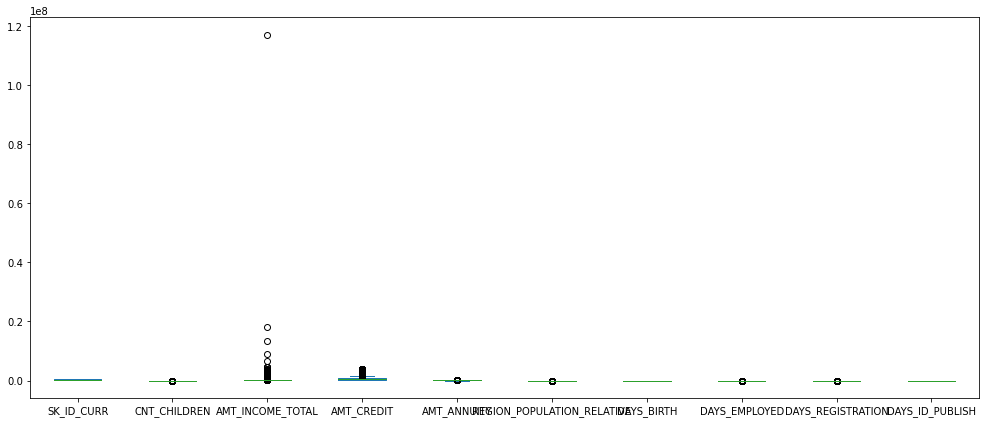

In [95]:
train.select_dtypes('number').iloc[:,:10].plot(kind='box', figsize=(17, 7))
plt.grid(False)
plt.show()

In [155]:
train.shape

(307505, 398)

In [96]:
def outliers(col):
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3, True, False)
    return pd.Series(idx_outliers, index=col. index)

In [97]:
numeric = train.select_dtypes("number").columns.to_list()

In [98]:
for i in numeric:
    idx = outliers(train_[i])
    if train.loc[idx==True].shape[0] < 2000:
        train = train.loc[idx==False]
        
    elif train.loc[idx==True].shape[0] >= 2000:
        outlier = train[i].loc[idx==True]
        median = train[i].median()
        for j in outlier:
            train[i].replace(j, median, inplace=True) 
            
    print(i, train.loc[idx==True].shape)

SK_ID_CURR (0, 399)
CNT_CHILDREN (4272, 399)
AMT_INCOME_TOTAL (0, 399)
AMT_CREDIT (3174, 399)
AMT_ANNUITY (0, 399)
REGION_POPULATION_RELATIVE (8315, 399)
DAYS_BIRTH (0, 399)
DAYS_EMPLOYED (0, 399)
DAYS_REGISTRATION (0, 399)
DAYS_ID_PUBLISH (0, 399)
OWN_CAR_AGE (0, 399)
FLAG_WORK_PHONE (0, 399)
FLAG_EMAIL (17364, 399)
CNT_FAM_MEMBERS (3996, 399)
REGION_RATING_CLIENT (0, 399)
HOUR_APPR_PROCESS_START (0, 399)
REG_REGION_NOT_LIVE_REGION (4618, 399)
REG_REGION_NOT_WORK_REGION (15509, 399)
LIVE_REGION_NOT_WORK_REGION (12412, 399)
REG_CITY_NOT_LIVE_CITY (23925, 399)
REG_CITY_NOT_WORK_CITY (0, 399)
LIVE_CITY_NOT_WORK_CITY (0, 399)
EXT_SOURCE_1 (0, 399)
EXT_SOURCE_2 (0, 399)
EXT_SOURCE_3 (0, 399)
APARTMENTS_AVG (0, 399)
BASEMENTAREA_AVG (0, 399)
YEARS_BEGINEXPLUATATION_AVG (0, 399)
YEARS_BUILD_AVG (0, 399)
COMMONAREA_AVG (0, 399)
ELEVATORS_AVG (0, 399)
ENTRANCES_AVG (0, 399)
FLOORSMAX_AVG (0, 399)
FLOORSMIN_AVG (0, 399)
LANDAREA_AVG (0, 399)
NONLIVINGAPARTMENTS_AVG (0, 399)
NONLIVINGAREA_AVG (0

client_credit_AMT_PAYMENT_CURRENT_min_sum (0, 399)
client_credit_NAME_CONTRACT_STATUS_Signed_mean_min (0, 399)
client_credit_NAME_CONTRACT_STATUS_Signed_mean_sum (0, 399)
client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_sum (0, 399)
client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_sum (0, 399)
client_credit_AMT_DRAWINGS_OTHER_CURRENT_sum_min (0, 399)
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_sum (0, 399)
client_credit_AMT_DRAWINGS_OTHER_CURRENT_sum_sum (0, 399)
client_credit_CNT_DRAWINGS_POS_CURRENT_sum_min (0, 399)
client_credit_CNT_DRAWINGS_POS_CURRENT_max_sum (0, 399)
client_credit_CNT_DRAWINGS_POS_CURRENT_sum_sum (0, 399)
client_credit_AMT_DRAWINGS_POS_CURRENT_sum_mean (0, 399)
client_credit_AMT_DRAWINGS_POS_CURRENT_max_sum (0, 399)
client_credit_AMT_DRAWINGS_POS_CURRENT_sum_sum (0, 399)
client_credit_NAME_CONTRACT_STATUS_Completed_mean_min (0, 399)
client_credit_NAME_CONTRACT_STATUS_Completed_mean_sum (0, 399)
client_credit_SK_DPD_DEF_mean_min (0, 399)
client_credit_SK_DPD_mean_min (0

client_bureau_balance_STATUS_0_mean_mean (0, 399)
client_bureau_balance_STATUS_C_mean_mean (0, 399)
client_bureau_balance_STATUS_X_mean_max (0, 399)
client_bureau_balance_STATUS_C_mean_max (0, 399)
client_bureau_balance_STATUS_0_mean_max (0, 399)
client_bureau_balance_STATUS_X_mean_sum (0, 399)
client_bureau_balance_STATUS_0_mean_sum (0, 399)
client_bureau_balance_STATUS_C_mean_sum (0, 399)
previous_CREDIT_TYPE_Mobile operator loan_mean (0, 399)
previous_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean (0, 399)
previous_CREDIT_ACTIVE_Bad debt_mean (0, 399)
previous_CREDIT_TYPE_Interbank credit_mean (0, 399)
previous_CREDIT_TYPE_Real estate loan_mean (0, 399)
previous_CREDIT_CURRENCY_currency 4_mean (0, 399)
previous_CREDIT_CURRENCY_currency 3_mean (0, 399)
previous_CREDIT_TYPE_Loan for the purchase of equipment_mean (0, 399)
previous_CREDIT_TYPE_Cash loan (non-earmarked)_mean (0, 399)
previous_CREDIT_TYPE_Unknown type of loan_mean (0, 399)
previous_CREDIT_TYPE_Another type

In [97]:
train.shape

(300418, 398)

In [160]:
train.to_csv("data_training_full_final_noout.csv", index=False)
test.to_csv("data_testing_full_final_noout.csv", index=False)

In [99]:
# Extract the ids
train_ = train.drop(columns = ['SK_ID_CURR'])
test_ = test.drop(columns = ['SK_ID_CURR'])

In [201]:
train_.to_csv("data_train_final_noout.csv", index=False)

In [202]:
test_.to_csv("data_test_final_noout.csv", index=False)

## Train Test Encoding n Scaling

**Label Encode atau OHE** -> https://sridianti.com/perbedaan-antara-pengkodean-label-dan-pengodean-satu-panas.html
- https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

- Gunakan Pengodean Label saat Anda memiliki fitur ordinal dalam data Anda untuk mendapatkan akurasi yang lebih tinggi dan juga saat ada terlalu banyak fitur kategoris dalam data Anda karena dalam skenario seperti itu, One Hot Encoding mungkin berkinerja buruk karena konsumsi memori yang tinggi saat membuat variabel dummy.

- Gunakan One Hot Encoding saat Anda memiliki fitur non-ordinal dan saat fitur kategoris dalam data Anda lebih sedikit.


**StandardScaler vs. MinMaxScaler vs. RobustScaler** ->
- https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9

- https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler

- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ -> implementasi in python

In [100]:
X = train_.drop(columns = ['TARGET']).copy()
y = train_['TARGET'].copy()

In [107]:
#create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
X_train.shape

(240334, 397)

In [109]:
y_train.value_counts()

0    220773
1     19561
Name: TARGET, dtype: int64

Data terlihat imbalance:
- target 0 =92% dari data
- target 1 = 8% dari data

perlu di handling imbalanced data

In [110]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in X_train:
    if X_train[col].dtype == 'category':
        # Train on the training data
        le.fit(X_train[col])
        # Transform both training and testing data
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
            
        # Keep track of how many columns were label encoded
        le_count += 1
            
print('%d columns were label encoded.' % le_count)

22 columns were label encoded.


In [111]:
X_train.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
263501                   0            0             0                1   
27738                    0            1             1                1   
254631                   1            1             1                1   
109660                   0            0             0                1   
49839                    0            0             0                1   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
263501             0          261000.0    162000.0       8401.5   
27738              2          270000.0   1168452.0      37822.5   
254631             1          126000.0    180000.0       9000.0   
109660             0           63000.0    810378.0      23823.0   
49839              0          382500.0    999121.5      42462.0   

        NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
263501                6                 7                    1   
27738                 1                 1                    4   
254631                6                 7                    4   
109660                6                 3                    4   
49839                 1                 7                    4   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
263501                   1                  1                    0.028663   
27738                    1                  1                    0.006233   
254631                   3                  1                    0.008575   
109660                   3                  1                    0.035792   
49839                    1                  1                    0.008230   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
263501      -16827        -1924.0            -1183.0             -384   
27738       -10997        -3659.0            -2026.0            -1825   
254631       -9953         -779.0            -4815.0            -2610   
109660      -23202        -1648.0           -13359.0            -4413   
49839       -14645        -1059.0            -5104.0            -5109   

        OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
263501          9.0           1               1                0   
27738          64.0           1               1                0   
254631          7.0           1               1                0   
109660          9.0           1               0                0   
49839           9.0           1               1                0   

        FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
263501                 1           0           0                3   
27738                  1           0           0               10   
254631                 1           0           0               10   
109660                 1           0           0                8   
49839                  1           0           0                8   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  WEEKDAY_APPR_PROCESS_START  \
263501              2.0                     2                           4   
27738               4.0                     2                           1   
254631              2.0                     2                           6   
109660              1.0                     2                           0   
49839               2.0                     2                           4   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
263501                       16                           0   
27738                        14                           0   
254631                       15                           0   
109660                       11                           0   
49839                        10                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
263501                           0                            0   
27738                            0                           

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)


with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           -0.322371    -0.717145     -0.712082         0.656268   
1           -0.322371     1.394419      1.404333         0.656268   
2            3.102015     1.394419      1.404333         0.656268   
3           -0.322371    -0.717145     -0.712082         0.656268   
4           -0.322371    -0.717145     -0.712082         0.656268   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0     -0.584069          1.100229   -1.135863    -1.308128         0.439169   
1      2.545873          1.204251    1.601903     0.762787        -2.377317   
2      0.980902         -0.460093   -1.086899    -1.266000         0.439169   
3     -0.584069         -1.188244    0.627865    -0.222624         0.439169   
4     -0.584069          2.504519    1.141288     1.089356        -2.377317   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0          0.909932            -1.705532           -0.410483   
1         -1.456974             0.617798           -0.410483   
2          0.909932             0.617798            1.546103   
3         -0.668006             0.617798            1.546103   
4          0.909932             0.617798           -0.410483   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          -0.304975                    0.864338   -0.176512       0.155096   
1          -0.304975                   -1.218924    1.160687      -0.657225   
2          -0.304975                   -1.001403    1.400144       0.691181   
3          -0.304975                    1.526468   -1.638714       0.284318   
4          -0.304975                   -1.033446    0.323963       0.560086   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           1.087286         1.729972    -0.151326     0.00204   
1           0.845491         0.775787     7.580093     0.00204   
2           0.045530         0.255984    -0.432469     0.00204   
3          -2.405123        -0.937906    -0.151326     0.00204   
4          -0.037364        -1.398775    -0.151326     0.00204   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0        0.472346        -0.493615          0.037584   -0.623014         0.0   
1        0.472346        -0.493615          0.037584   -0.623014         0.0   
2        0.472346        -0.493615          0.037584   -0.623014         0.0   
3       -2.117090        -0.493615          0.037584   -0.623014         0.0   
4        0.472346        -0.493615          0.037584   -0.623014         0.0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        -1.343395        -0.133651             -0.112688   
1         0.577900         2.255857             -0.112688   
2         0.577900        -0.133651             -0.112688   
3         0.028959        -1.328405             -0.112688   
4         0.028959        -0.133651             -0.112688   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    0.423335                 1.221706   
1                   -0.972707                 0.602887   
2                    1.354029                 0.912297   
3                   -1.438055                -0.325343   
4                    0.423335                -0.634753   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4 

In [113]:
X_train_scaled.shape

(240334, 397)

## Handling imbalance data

In [133]:
#Handling imbalance data with Undersampling
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler()

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))
print(X_train_under.shape)

Before undersampling:  Counter({0: 220773, 1: 19561})
After undersampling:  Counter({0: 19561, 1: 19561})
(39122, 397)


In [142]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)
# new class distribution 
print(Counter(y_ros))
print(X_ros.shape)

Before oversampling:  Counter({0: 220773, 1: 19561})
Counter({0: 220773, 1: 220773})
(441546, 397)


In [146]:
#https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf
# instantiating over and under sampler
over = RandomOverSampler()
under = RandomUnderSampler()
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X_train_scaled, y_train)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 220773, 1: 220773})
Combined Random Sampling: Counter({0: 220773, 1: 220773})


In [147]:
X_combined_sampling.shape

(441546, 397)

## Analisis Regresi

Regresi adalah metode untuk mengamati dua variabel atau lebih

regresi digunakan untuk menemukan hubungan antara variabel terikat dan variabel bebas. Model regresi ini juga dipakai berbagai keperluan, seperti menjelaskan hubungan dan memprediksi.

Regresi adalah sebuah metode yang berfungsi untuk memprediksi atau memperkirakan pengaruh dari dua atau lebih variabel fungsional tertentu.

Regresi : terdiri dari algoritma yaitu, Logistic Regression, Decision Tree, dan Random Forest.

## Logistic Regression

### Logreg Awal

In [130]:
log_reg = LogisticRegression(C = 0.001)

# Train on the training data
log_reg = log_reg.fit(X_train_scaled, y_train)

preds_train = log_reg.predict(X_train_scaled)

In [131]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_train_scaled, y_train)))

print("train prediction samples:\n", preds_train[:10])
print("train target samples:\n", y_train[:10].tolist())

print("ROC AUC score for sample data: ", roc_auc_score(y_train, preds_train))

Accuracy of logistic regression classifier on test set: 0.92
train prediction samples:
 [0 0 0 0 0 0 0 0 0 0]
train target samples:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ROC AUC score for sample data:  0.5099225951410767


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    220773
           1       0.54      0.02      0.04     19561

    accuracy                           0.92    240334
   macro avg       0.73      0.51      0.50    240334
weighted avg       0.89      0.92      0.88    240334



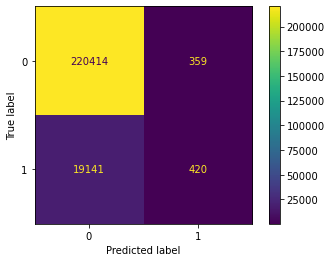

In [132]:
print(classification_report(y_train, preds_train))
ConfusionMatrixDisplay(confusion_matrix(y_train, preds_train)).plot();

In [267]:
preds_test = log_reg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test_scaled, y_test)))

print("ROC AUC score for sample data: ", roc_auc_score(y_test, preds_test))

Accuracy of logistic regression classifier on test set: 0.92
ROC AUC score for sample data:  0.5020380751916544


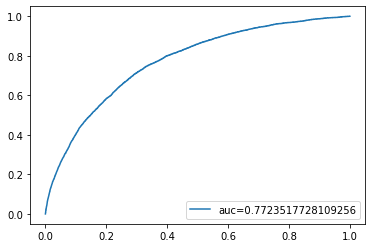

In [268]:
y_prediction_probability = log_reg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.12      0.21     55201
           1       0.08      0.89      0.15      4883

    accuracy                           0.18     60084
   macro avg       0.50      0.50      0.18     60084
weighted avg       0.85      0.18      0.20     60084



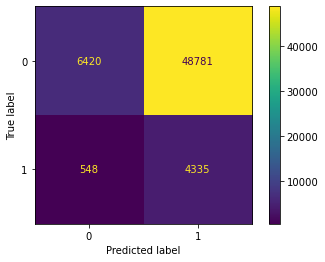

In [269]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay(confusion_matrix(y_test, preds_test)).plot();

- bisa dilihat perbandingan dari presisi dan recall antara target 0 dan 1. sangat beda jauh
- pada target 0 terlihat bisa di prediksi dengan baik, tetapi sebaliknya target 0 sangat jelek (tidak bisa memprediksi)
- score pada ROC AUC juga jelek hanya 0.5

### Logreg Combination (OverUnderSampling)

In [218]:
# Make the model with the specified regularization parameter
log_reg_comb = LogisticRegression(C = 0.001, solver="saga")

# Train on the training data
log_reg_comb.fit(X_combined_sampling, y_combined_sampling)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.001, solver='saga')

In [115]:
print(log_reg_comb.get_params())

{'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [219]:
pred_train_comb = log_reg_comb.predict(X_combined_sampling)

In [220]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_comb.score(X_combined_sampling, y_combined_sampling)))

Accuracy of logistic regression classifier on test set: 0.70


In [222]:
from sklearn.metrics import roc_auc_score
print("ROC AUC score for underover data: ", roc_auc_score(y_combined_sampling, pred_train_comb))

ROC AUC score for underover data:  0.7042165482192116


              precision    recall  f1-score   support

           0       0.70      0.70      0.70    220773
           1       0.70      0.70      0.70    220773

    accuracy                           0.70    441546
   macro avg       0.70      0.70      0.70    441546
weighted avg       0.70      0.70      0.70    441546



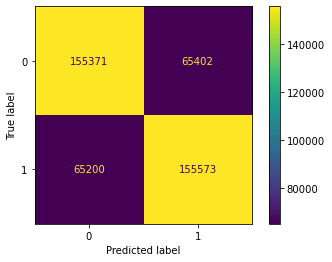

In [221]:
print(classification_report(y_combined_sampling, pred_train_comb))

# # Create the confusion matrix
cm_train_comb = confusion_matrix(y_combined_sampling, pred_train_comb)

ConfusionMatrixDisplay(confusion_matrix=cm_train_comb).plot();

In [223]:
pred_test_comb = log_reg_comb.predict(X_test_scaled)

In [224]:
print("ROC AUC score for underover data: ", roc_auc_score(y_test, pred_test_comb ))

ROC AUC score for underover data:  0.7069202253327119


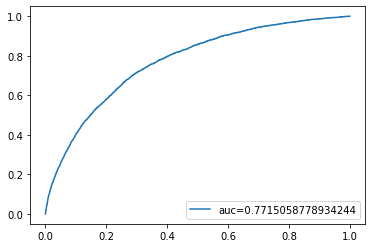

In [123]:
y_pred_comb_proba = log_reg_comb.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_comb_proba)
auc = metrics.roc_auc_score(y_test, y_pred_comb_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     55201
           1       0.18      0.71      0.28      4883

    accuracy                           0.71     60084
   macro avg       0.57      0.71      0.55     60084
weighted avg       0.90      0.71      0.77     60084



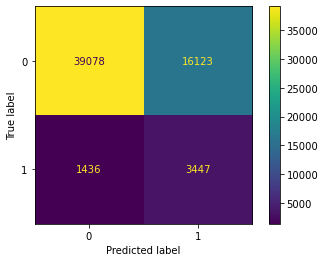

In [225]:
print(classification_report(y_test, pred_test_comb))

# Create the confusion matrix
cm_test_comb = confusion_matrix(y_test, pred_test_comb)

ConfusionMatrixDisplay(confusion_matrix=cm_test_comb).plot();

### Logreg UnderSampling

In [213]:
# Make the model with the specified regularization parameter
log_reg_under = LogisticRegression(C = 0.001)

# Train on the training data
log_reg_under = log_reg_under.fit(X_train_under, y_train_under)

In [214]:
pred_train_under = log_reg_under.predict(X_train_under)

In [215]:
print("ROC AUC score for undersampled data: ", roc_auc_score(y_train_under, pred_train_under))

ROC AUC score for undersampled data:  0.7048463779970349


Accuracy of logistic regression classifier on test set: 0.70
              precision    recall  f1-score   support

           0       0.70      0.71      0.71     19561
           1       0.71      0.70      0.70     19561

    accuracy                           0.70     39122
   macro avg       0.70      0.70      0.70     39122
weighted avg       0.70      0.70      0.70     39122



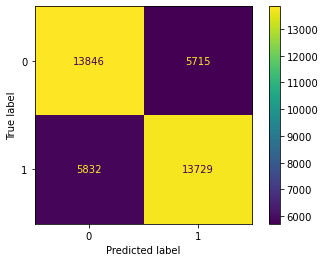

In [216]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_under.score(X_train_under, y_train_under)))
print(classification_report(y_train_under, pred_train_under))

#create the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_train_under, pred_train_under)).plot();

In [217]:
pred_test_under = log_reg_under.predict(X_test_scaled)

In [218]:
print("ROC AUC score for undersampled data:` ", roc_auc_score(y_test, pred_test_under))

ROC AUC score for undersampled data:`  0.7056880148571629


Accuracy of logistic regression classifier on test set: 0.70
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     55201
           1       0.17      0.71      0.28      4883

    accuracy                           0.70     60084
   macro avg       0.57      0.71      0.55     60084
weighted avg       0.90      0.70      0.77     60084



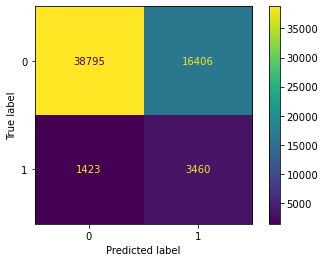

In [219]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_under.score(X_test_scaled, y_test)))
print(classification_report(y_test, pred_test_under))

# # Create the confusion matrix
cm_train_under = confusion_matrix(y_test, pred_test_under)

ConfusionMatrixDisplay(confusion_matrix=cm_train_under).plot();

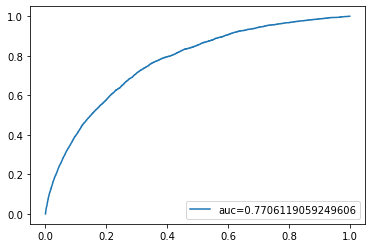

In [221]:
y_pred_under_proba = log_reg_under.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_under_proba)
auc = metrics.roc_auc_score(y_test, y_pred_under_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logreg OverSampling

In [236]:
# Make the model with the specified regularization parameter
log_reg_ros = LogisticRegression(C = 0.001, solver="saga")

# Train on the training data
log_reg_ros = log_reg_ros.fit(X_ros, y_ros)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [237]:
# pred_train_ros = log_reg_ros.predict(X_ros_scaled)
pred_train_ros = log_reg_ros.predict(X_ros)

In [238]:
print("ROC AUC score for oversampled data: ", roc_auc_score(y_ros, pred_train_ros))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_ros.score(X_ros, y_ros)))

ROC AUC score for oversampled data:  0.7038972156921364
Accuracy of logistic regression classifier on test set: 0.70


              precision    recall  f1-score   support

           0       0.70      0.70      0.70    220773
           1       0.70      0.70      0.70    220773

    accuracy                           0.70    441546
   macro avg       0.70      0.70      0.70    441546
weighted avg       0.70      0.70      0.70    441546



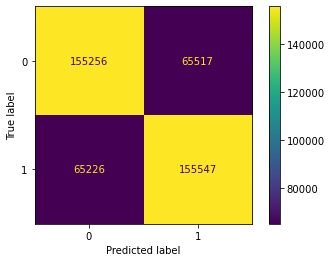

In [239]:
print(classification_report(y_ros, pred_train_ros))

# # Create the confusion matrix
cm_train_ros = confusion_matrix(y_ros, pred_train_ros)

ConfusionMatrixDisplay(confusion_matrix=cm_train_ros).plot();

In [240]:
pred_test_ros = log_reg_ros.predict(X_test_scaled)

In [241]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_ros.score(X_test_scaled, y_test)))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_test_ros))

Accuracy of logistic regression classifier on test set: 0.71
ROC AUC score for undersampled data:  0.7051613765630176


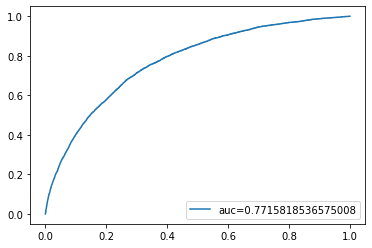

In [242]:
from sklearn import metrics
y_prediction_probability = log_reg_ros.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     55201
           1       0.18      0.70      0.28      4883

    accuracy                           0.71     60084
   macro avg       0.57      0.71      0.55     60084
weighted avg       0.90      0.71      0.77     60084



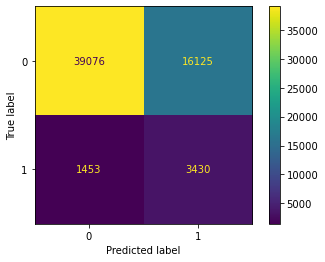

In [243]:
print(classification_report(y_test, pred_test_ros))

# # Create the confusion matrix
cm_test_ros = confusion_matrix(y_test, pred_test_ros)

ConfusionMatrixDisplay(confusion_matrix=cm_test_ros).plot();

## LightGBM

### LightGBM awal

In [117]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test),(X_train_scaled,y_train)],
          verbose=20,eval_metric='logloss')

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.249002	valid_0's binary_logloss: 0.251478
[40]	training's binary_logloss: 0.240251	valid_0's binary_logloss: 0.245655
[60]	training's binary_logloss: 0.235002	valid_0's binary_logloss: 0.243367
[80]	training's binary_logloss: 0.230919	valid_0's binary_logloss: 0.242228
[100]	training's binary_logloss: 0.2274	valid_0's binary_logloss: 0.24189


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [119]:
print('Training accuracy {:.4f}'.format(model.score(X_train_scaled,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test_scaled,y_test)))

Training accuracy 0.9210
Testing accuracy 0.9187


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55201
           1       0.50      0.03      0.05      4883

    accuracy                           0.92     60084
   macro avg       0.71      0.51      0.51     60084
weighted avg       0.89      0.92      0.88     60084



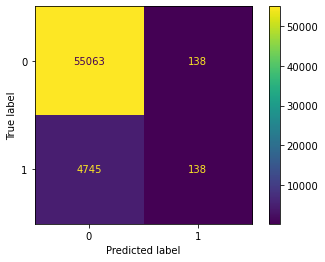

In [129]:
print(classification_report(y_test, model.predict(X_test_scaled)))

ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test_scaled))).plot();

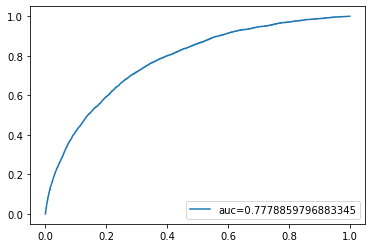

In [178]:
y_prediction_probability = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### LightGBM undersampling

In [137]:
import lightgbm as lgb
model_under = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_under.fit(X_train_under,y_train_under,eval_set=[(X_test_scaled,y_test),(X_train_under,y_train_under)],
          verbose=20,eval_metric='logloss')

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.587128	valid_0's binary_logloss: 0.60029
[40]	training's binary_logloss: 0.554828	valid_0's binary_logloss: 0.58246
[60]	training's binary_logloss: 0.53391	valid_0's binary_logloss: 0.575663
[80]	training's binary_logloss: 0.517606	valid_0's binary_logloss: 0.572863
[100]	training's binary_logloss: 0.503564	valid_0's binary_logloss: 0.571808


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [141]:
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, model_under.predict(X_test_scaled)))

ROC AUC score for undersampled data:  0.7045230154236515


              precision    recall  f1-score   support

           0       0.96      0.71      0.81     55201
           1       0.17      0.70      0.28      4883

    accuracy                           0.71     60084
   macro avg       0.57      0.70      0.55     60084
weighted avg       0.90      0.71      0.77     60084



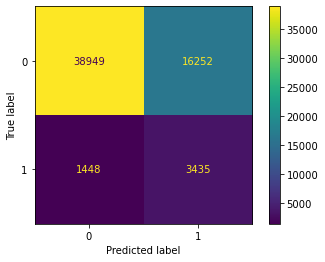

In [140]:
print(classification_report(y_test, model_under.predict(X_test_scaled)))

ConfusionMatrixDisplay(confusion_matrix(y_test, model_under.predict(X_test_scaled))).plot();

### LightGBM oversampling

In [144]:
import lightgbm as lgb
model_ros = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_ros.fit(X_ros,y_ros,eval_set=[(X_test_scaled,y_test),(X_ros,y_ros)],
          verbose=20,eval_metric='logloss')

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.593341	valid_0's binary_logloss: 0.594531
[40]	training's binary_logloss: 0.565445	valid_0's binary_logloss: 0.569893
[60]	training's binary_logloss: 0.548932	valid_0's binary_logloss: 0.557106
[80]	training's binary_logloss: 0.536672	valid_0's binary_logloss: 0.548629
[100]	training's binary_logloss: 0.526526	valid_0's binary_logloss: 0.542045


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [207]:
print("ROC AUC score for over sampled data: ", roc_auc_score(y_test, model_ros.predict(X_test_scaled)))

ROC AUC score for over sampled data:  0.7092218747294878


              precision    recall  f1-score   support

           0       0.96      0.73      0.83     55201
           1       0.18      0.69      0.29      4883

    accuracy                           0.72     60084
   macro avg       0.57      0.71      0.56     60084
weighted avg       0.90      0.72      0.78     60084



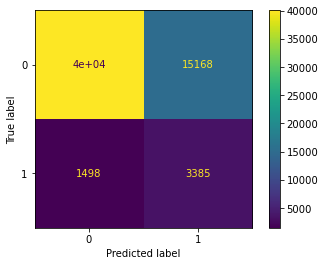

In [145]:
print(classification_report(y_test, model_ros.predict(X_test_scaled)))

ConfusionMatrixDisplay(confusion_matrix(y_test, model_ros.predict(X_test_scaled))).plot();

### LightGBM underoversampling (combined)

In [150]:
import lightgbm as lgb
model_comb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_comb.fit(X_combined_sampling,y_combined_sampling,eval_set=[(X_test_scaled,y_test),(X_combined_sampling,y_combined_sampling)],
          verbose=20,eval_metric='logloss')

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.59269	valid_0's binary_logloss: 0.59407
[40]	training's binary_logloss: 0.56466	valid_0's binary_logloss: 0.569149
[60]	training's binary_logloss: 0.548258	valid_0's binary_logloss: 0.556271
[80]	training's binary_logloss: 0.53588	valid_0's binary_logloss: 0.547735
[100]	training's binary_logloss: 0.52558	valid_0's binary_logloss: 0.541213


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [209]:
print("ROC AUC score for combinedsampled data: ", roc_auc_score(y_test, model_comb.predict(X_test_scaled)))

ROC AUC score for combinedsampled data:  0.710703040410288


              precision    recall  f1-score   support

           0       0.96      0.73      0.83     55201
           1       0.18      0.69      0.29      4883

    accuracy                           0.72     60084
   macro avg       0.57      0.71      0.56     60084
weighted avg       0.90      0.72      0.79     60084



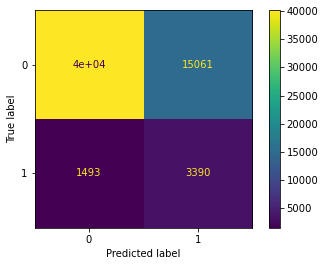

In [151]:
print(classification_report(y_test, model_comb.predict(X_test_scaled)))

ConfusionMatrixDisplay(confusion_matrix(y_test, model_comb.predict(X_test_scaled))).plot();

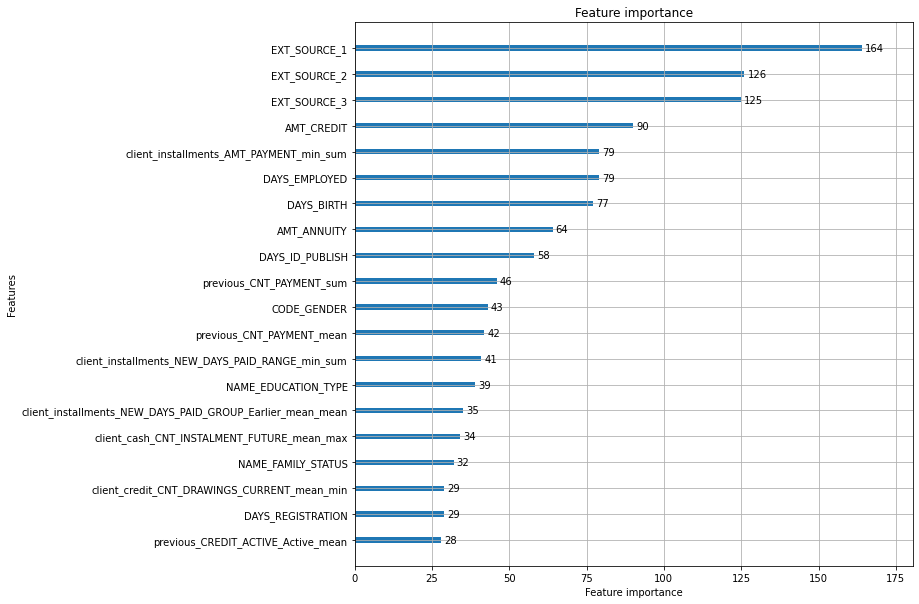

In [176]:
feature = lgb.plot_importance(model_comb, max_num_features = 20, figsize = (10,10))

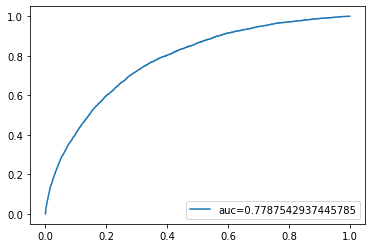

In [177]:
y_prediction_probability = model_comb.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Adaboost

In [222]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_combined_sampling, y_combined_sampling)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [223]:
preds_train_clf = clf.predict(X_combined_sampling)

              precision    recall  f1-score   support

           0       0.70      0.71      0.70    176618
           1       0.70      0.70      0.70    176618

    accuracy                           0.70    353236
   macro avg       0.70      0.70      0.70    353236
weighted avg       0.70      0.70      0.70    353236



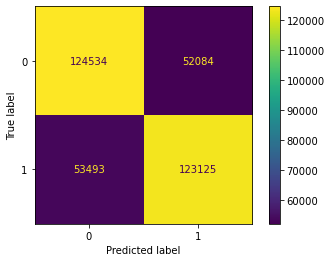

In [224]:
print(classification_report(y_combined_sampling, preds_train_clf))

ConfusionMatrixDisplay(confusion_matrix(y_combined_sampling, preds_train_clf)).plot();

In [225]:
preds_test_clf = clf.predict(X_test_scaled)

In [226]:
accuracy_score(y_test, preds_test_clf)

0.7053791358764396

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     55201
           1       0.17      0.69      0.28      4883

    accuracy                           0.71     60084
   macro avg       0.57      0.70      0.55     60084
weighted avg       0.90      0.71      0.77     60084



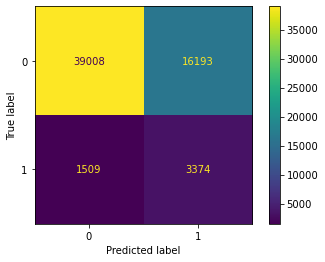

In [227]:
print(classification_report(y_test, preds_test_clf))

ConfusionMatrixDisplay(confusion_matrix(y_test, preds_test_clf)).plot();

## Random Forest

### Random Forest Awal

In [271]:
##https://www.datacamp.com/tutorial/random-forests-classifier-python
# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the random search object to the data
rf =rf.fit(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    220773
           1       0.56      0.97      0.71     19561

    accuracy                           0.94    240334
   macro avg       0.78      0.95      0.84    240334
weighted avg       0.96      0.94      0.94    240334



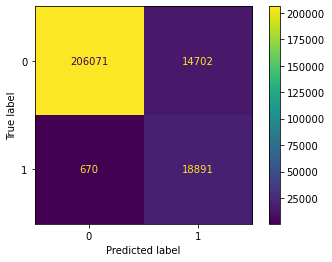

In [272]:
# Generate predictions with the best model
pred_train_rf = best_rf.predict(X_train_scaled)

# tidak ada score untuk category 1
print(classification_report(y_train, pred_train_rf))

ConfusionMatrixDisplay(confusion_matrix(y_train, pred_train_rf)).plot();

In [273]:
# Generate predictions with the best model
pred_test_ros = rf_ros.predict(X_test_scaled)

print("ROC AUC score for oversampled data: ", roc_auc_score(y_test, pred_test_ros))

ROC AUC score for oversampled data:  0.6426054685343455


              precision    recall  f1-score   support

           0       0.94      0.88      0.91     55201
           1       0.23      0.40      0.29      4883

    accuracy                           0.84     60084
   macro avg       0.59      0.64      0.60     60084
weighted avg       0.89      0.84      0.86     60084



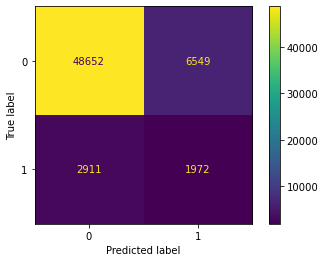

In [274]:
# Create the confusion matrix
print(classification_report(y_test, pred_test_ros))

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_test_ros)).plot();

### Random Forest Oversampling

In [245]:
#https://www.datacamp.com/tutorial/random-forests-classifier-python
model_rf = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf_ros = model_rf.fit(X_ros, y_ros)

In [247]:
# Generate predictions with the best model
pred_trainrf_ros = rf_ros.predict(X_ros)

print("ROC AUC score for oversampled data: ", roc_auc_score(y_ros, pred_trainrf_ros))

ROC AUC score for oversampled data:  0.9427873879505193


              precision    recall  f1-score   support

           0       0.97      0.91      0.94    220773
           1       0.92      0.98      0.94    220773

    accuracy                           0.94    441546
   macro avg       0.94      0.94      0.94    441546
weighted avg       0.94      0.94      0.94    441546



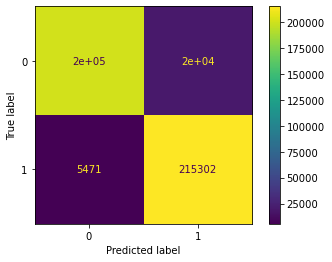

In [248]:
# Create the confusion matrix
print(classification_report(y_ros, pred_trainrf_ros))

ConfusionMatrixDisplay(confusion_matrix(y_ros, pred_trainrf_ros)).plot();

In [250]:
# Generate predictions with the best model
pred_testrf_ros = rf_ros.predict(X_test_scaled)

print("ROC AUC score for oversampled data: ", roc_auc_score(y_test, pred_testrf_ros))

ROC AUC score for oversampled data:  0.6426054685343455


              precision    recall  f1-score   support

           0       0.94      0.88      0.91     55201
           1       0.23      0.40      0.29      4883

    accuracy                           0.84     60084
   macro avg       0.59      0.64      0.60     60084
weighted avg       0.89      0.84      0.86     60084



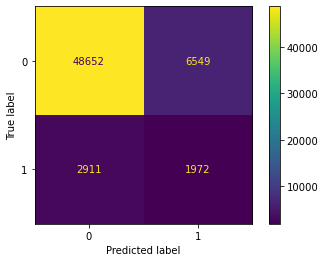

In [251]:
# Create the confusion matrix
print(classification_report(y_test, pred_testrf_ros))

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_testrf_ros)).plot();

### Random Forest underSampling

In [228]:
rf_under = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf_under.fit(X_train_under, y_train_under)

RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_leaf=4,
                       n_estimators=50, random_state=2018)

In [229]:
# Generate predictions with the best model
pred_rftrain_under = rf_under.predict(X_train_under)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_train_under, pred_rftrain_under))

ROC AUC score for undersampled data:  0.7283369970860386


              precision    recall  f1-score   support

           0       0.73      0.73      0.73     19561
           1       0.73      0.73      0.73     19561

    accuracy                           0.73     39122
   macro avg       0.73      0.73      0.73     39122
weighted avg       0.73      0.73      0.73     39122



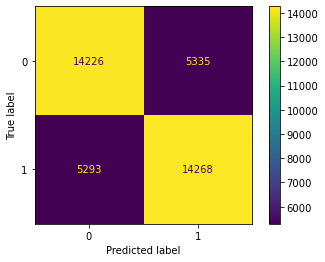

In [232]:
print(classification_report(y_train_under, pred_rftrain_under))

# Create the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_train_under, pred_rftrain_under)).plot();

In [233]:
# Generate predictions with the best model
pred_rftest_under = rf_under.predict(X_test_scaled)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_rftest_under))

ROC AUC score for undersampled data:  0.6872094209442903


In [191]:
# Generate predictions with the best model
pred_rftest_under = rf_under.predict(X_test_scaled)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_rftest_under))

ROC AUC score for undersampled data:  0.5293247475460067


              precision    recall  f1-score   support

           0       0.96      0.68      0.80     55201
           1       0.16      0.69      0.26      4883

    accuracy                           0.68     60084
   macro avg       0.56      0.69      0.53     60084
weighted avg       0.90      0.68      0.75     60084



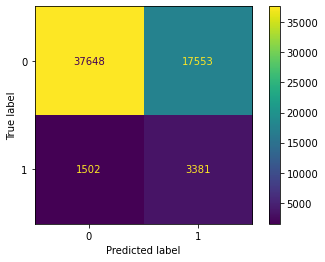

In [234]:
print(classification_report(y_test, pred_rftest_under))

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rftest_under)).plot();

- https://ichi.pro/id/akurasi-presisi-recall-dan-skor-f1-108847525674158 -> presisi, recall, f1

### Random Forest Combined(OverUnderSampling)

In [186]:
##https://www.datacamp.com/tutorial/random-forests-classifier-python
param_dist = {'n_estimators': randint(50,200),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
best_model_rf = rand_search.fit(X_combined_sampling, y_combined_sampling)

In [187]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 115}


In [188]:
# Generate predictions with the best model
pred_rftrain_combined = best_model_rf.predict(X_combined_sampling)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_combined_sampling, pred_rftrain_combined))

ROC AUC score for undersampled data:  0.9554632030710346


              precision    recall  f1-score   support

           0       0.97      0.94      0.95    176618
           1       0.94      0.97      0.96    176618

    accuracy                           0.96    353236
   macro avg       0.96      0.96      0.96    353236
weighted avg       0.96      0.96      0.96    353236



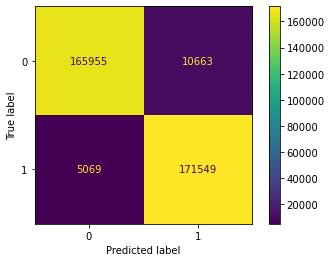

In [190]:
print(classification_report(y_combined_sampling, pred_rftrain_combined))

# Create the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_combined_sampling, pred_rftrain_combined)).plot();

In [191]:
# Generate predictions with the best model
pred_rftest_combined = best_model_rf.predict(X_test_scaled)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_rftest_combined))

ROC AUC score for undersampled data:  0.6274039568900627


              precision    recall  f1-score   support

           0       0.94      0.91      0.92     55201
           1       0.25      0.35      0.29      4883

    accuracy                           0.86     60084
   macro avg       0.59      0.63      0.61     60084
weighted avg       0.88      0.86      0.87     60084



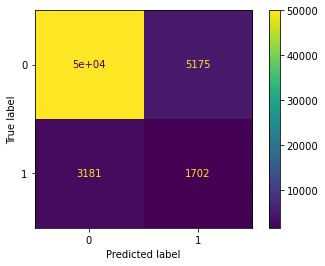

In [192]:
print(classification_report(y_test, pred_rftest_combined))

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rftest_combined)).plot();

In [210]:
rf_comb = RandomForestClassifier(max_depth = 16, n_estimators = 115)
rf_comb.fit(X_combined_sampling, y_combined_sampling)

RandomForestClassifier(max_depth=16, n_estimators=115)

In [211]:
# Generate predictions with the best model
pred_rftrain_combined = rf_comb.predict(X_combined_sampling)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_combined_sampling, pred_rftrain_combined))

ROC AUC score for undersampled data:  0.9546434573068264


              precision    recall  f1-score   support

           0       0.97      0.94      0.95    220773
           1       0.94      0.97      0.96    220773

    accuracy                           0.95    441546
   macro avg       0.96      0.95      0.95    441546
weighted avg       0.96      0.95      0.95    441546



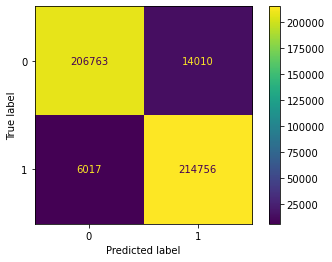

In [212]:
print(classification_report(y_combined_sampling, pred_rftrain_combined))

# Create the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_combined_sampling, pred_rftrain_combined)).plot();

In [213]:
# Generate predictions with the best model
pred_rftest_combined = rf_comb.predict(X_test_scaled)

print("ROC AUC score for combinedsampled data: ", roc_auc_score(y_test, pred_rftest_combined))

ROC AUC score for combinedsampled data:  0.6217370678882128


              precision    recall  f1-score   support

           0       0.94      0.91      0.92     55201
           1       0.25      0.33      0.28      4883

    accuracy                           0.86     60084
   macro avg       0.59      0.62      0.60     60084
weighted avg       0.88      0.86      0.87     60084



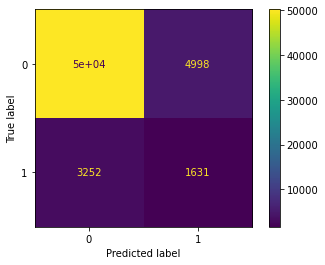

In [214]:
print(classification_report(y_test, pred_rftest_combined))

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rftest_combined)).plot();

### Feature Importance

Selain spesifikasi model, Feature yang dimiliki oleh data akan menjadi pusat utama untuk menjelaskan model prediksi yang kita latih. Feature Importances sehingga bisa dikatakan sebagai tolak ukur besaran kontribusi berbagai data feature yang dilatih kepada performa model prediksi.

- https://medium.com/purwadhikaconnect/metode-feature-importance-dalam-data-science-yang-perlu-kamu-ketahui-6b4f35db6476

<AxesSubplot:>

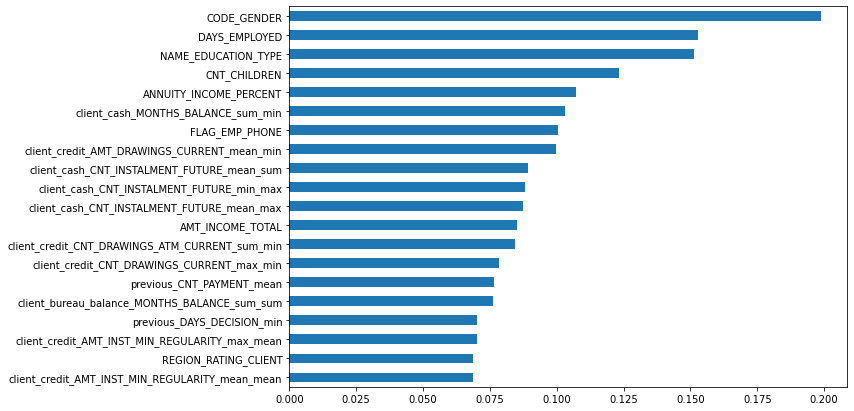

In [226]:
feature_imp = pd.Series(log_reg_comb.coef_[0], index=X_combined_sampling.columns).sort_values(ascending=False)
feature = feature_imp.head(20).sort_values(ascending=True)
feature.plot(kind='barh', figsize=(10, 7))

<AxesSubplot:>

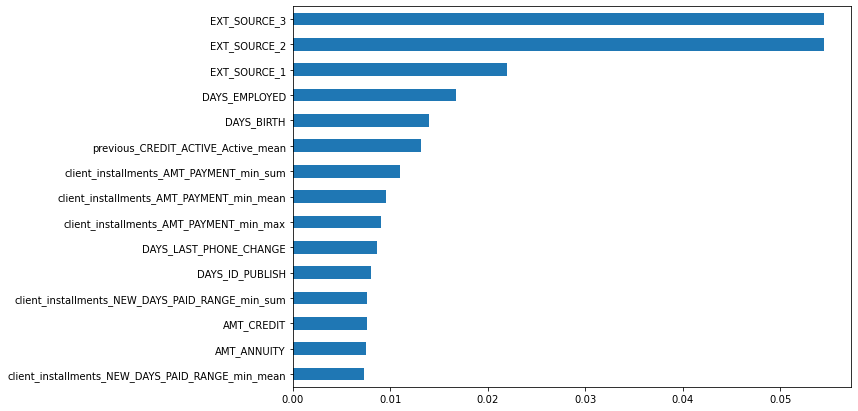

In [217]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_comb.feature_importances_, index=X_combined_sampling.columns).sort_values(ascending=False)

# Plot a simple bar chart
# feature_importances.plot.bar();
feature = feature_importances.head(15).sort_values(ascending=True)
feature.plot(kind='barh', figsize=(10, 7))

## Prediction Score with Data Test

menggunakan model LightGBM dengan data training dari combined overundersampling

In [203]:
app_train = train_.drop(columns = ['TARGET']).copy()
train_labels = train_['TARGET'].copy()
app_test = test_.copy()

In [194]:
app_train.shape

(300418, 397)

In [204]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'category':
        # Train on the training data
        le.fit(app_train[col])
        # Transform both training and testing data
        app_train[col] = le.transform(app_train[col])
        app_test[col] = le.transform(app_test[col])
            
        # Keep track of how many columns were label encoded
        le_count += 1
            
print('%d columns were label encoded.' % le_count)

22 columns were label encoded.


In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

app_test_scaled = pd.DataFrame(
    scaler.transform(app_test),
    columns=app_test.columns
)


with pd.option_context("display.max_columns", None):
    display(app_train_scaled.head())

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           -0.323124     1.393366     -0.713029         0.656219   
1           -0.323124    -0.717687     -0.713029        -1.523882   
2            3.094790     1.393366      1.402468         0.656219   
3           -0.323124    -0.717687     -0.713029         0.656219   
4           -0.323124     1.393366     -0.713029         0.656219   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
0     -0.584064          0.423880   -0.470757    -0.160519         0.440139   
1     -0.584064          1.203256    1.941585     0.613092        -2.372323   
2     -0.584064         -1.134872   -1.209490    -1.423176         0.440139   
3     -0.584064         -0.355496   -0.726202     0.190202         0.440139   
4     -0.584064         -0.511371   -0.181347    -0.359936         0.440139   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0          0.910823             0.617370            1.546487   
1         -0.272326            -1.706395           -0.409429   
2          0.910823             0.617370            1.546487   
3          0.910823             0.617370           -1.387387   
4          0.910823             0.617370            1.546487   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          -0.304325                   -0.052137    1.514159       0.758196   
1          -0.304325                   -1.470195   -0.161338       0.500085   
2          -0.304325                   -0.867010   -0.684587       0.951194   
3          -0.304325                   -1.054070   -0.675182      -0.366999   
4          -0.304325                    0.864303   -0.887831      -0.366530   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           0.379933         0.581937    -0.151711    0.001824   
1           1.086538         1.793735    -0.151711    0.001824   
2           0.204286         0.309631     2.233003    0.001824   
3          -1.395190         0.371910    -0.151711    0.001824   
4           0.189649        -0.304550    -0.151711    0.001824   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0        0.472109        -0.493471          0.038298    1.606087         0.0   
1        0.472109        -0.493471          0.038298    1.606087         0.0   
2        0.472109         2.026461          0.038298    1.606087         0.0   
3        0.472109        -0.493471          0.038298   -0.622631         0.0   
4        0.472109        -0.493471          0.038298   -0.622631         0.0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         0.028160        -1.329493             -0.113435   
1        -1.343897        -0.134733             -2.087586   
2         0.028160        -1.329493             -0.113435   
3         0.028160        -0.134733             -0.113435   
4        -1.343897        -1.329493             -0.113435   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    1.354506                -0.635061   
1                   -0.972545                -0.325779   
2                   -0.972545                -0.944342   
3                    1.354506                 1.529910   
4                    0.423685                -0.325779   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4 

### Logistic Regression

Pakai handling imbalance yg mnaa?

In [228]:
import lightgbm as lgb
model_comb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_comb.fit(X_combined_sampling,y_combined_sampling)

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [227]:
pred_lgb = model_comb.predict_proba(app_test_scaled)[:, 1]
pred_lgb

array([0.27424113, 0.59445833, 0.1174326 , ..., 0.17147982, 0.23454545,
       0.66269368])

In [229]:
app_test_scaled.shape

(48744, 397)

In [231]:
# Make a submission dataframe
score = df_test[['SK_ID_CURR']]
score['TARGET'] = predictions

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5804/1361021689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['TARGET'] = predictions


In [250]:
score

SK_ID_CURR    TARGET
0          100001  0.274241
1          100005  0.594458
2          100013  0.117433
3          100028  0.307778
4          100038  0.524894
...           ...       ...
48739      456221  0.353924
48740      456222  0.336093
48741      456223  0.171480
48742      456224  0.234545
48743      456250  0.670210

[48744 rows x 2 columns]